## 0. Importing Packaged

In [1]:
path='G:/Shared drives/BeStarsMiMeS/ScienceFiles/' #Patrick's google file stream path

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
import specpolFlow as pol

from matplotlib.backends.backend_pdf import PdfPages
import pyRaven as rav


In [3]:
import pandas as pd
sheet_id = '1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk'
sheet_name = 'Stars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)

sheet_name = 'Observations'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Observations=pd.read_csv(url)

In [37]:
Be_vsini=[]
i_min=[]
Teff=[]
logg=[]
name=[]
for i in range(StarData['Name'].size):
    if StarData['pyRavenFlag'][i]==1 or StarData['pyRavenFlag'][i]==2:
        Be_vsini.append(StarData['vsini-estimate'][i])
        i_min.append(StarData['i_min [deg]'][i])
        Teff.append(StarData['T'][i])
        logg.append(StarData['log(g)'][i])
        name.append(StarData['Name'][i])

Be_vsini=np.array(Be_vsini)
i_min=np.array(i_min)
Teff=np.array(Teff)
logg=np.array(logg)
name=np.array(name)

[]

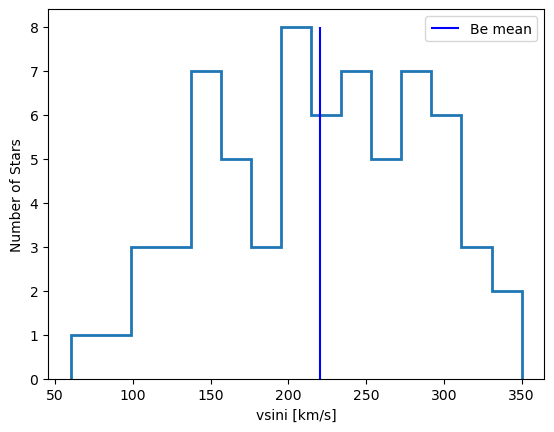

In [5]:
fig,ax=plt.subplots(1,1)
ax.hist(Be_vsini,bins=15,histtype='step',linewidth=2)
ax.vlines([Be_vsini.mean()],0,8,color='b',label='Be mean')
ax.set_xlabel('vsini [km/s]')
ax.set_ylabel('Number of Stars')
ax.legend()
plt.plot()

In [15]:
np.histogram(Be_vsini,bins=15)

(array([1, 1, 3, 3, 7, 5, 3, 8, 6, 7, 5, 7, 6, 3, 2], dtype=int64),
 array([ 60.        ,  79.33333333,  98.66666667, 118.        ,
        137.33333333, 156.66666667, 176.        , 195.33333333,
        214.66666667, 234.        , 253.33333333, 272.66666667,
        292.        , 311.33333333, 330.66666667, 350.        ]))

In [7]:
import itertools


### This gets rid of the warnings in the cells where it is creating more than 20 figures (i.e. 1.2)
#### Not needed for this notebook but could be useful in the future
#import warnings
#warnings.filterwarnings("default", message="More than 20 figures have been opened.")
models=['hybrid_maskdepth0.02_tellClean', 
 'hybrid_SuperCleanAsif+tellClean',
 'normalized_SuperCleanAsif+tellClean']

## 1. Bpole Cumulative Hist

In [8]:
bins=np.arange(0,20000+5,5)
hybrid_full_V=np.loadtxt('{}06-RavenCalculations/hybrid_maskdepth0.01_tellClean_histtotal.txt'.format(path))
hybrid_full_N=np.loadtxt('{}06-RavenCalculations/hybrid_maskdepth0.01_tellClean_N_histtotal.txt'.format(path))
hybrid_full_V_upper=pd.read_csv('{}06-RavenCalculations/hybrid_maskdepth0.01_tellClean_UpperLimits.csv'.format(path))

hybrid_super_V=np.loadtxt('{}06-RavenCalculations/hybrid_CleanAsif+tellClean_histtotal.txt'.format(path))
hybrid_super_N=np.loadtxt('{}06-RavenCalculations/hybrid_CleanAsif+tellClean_N_histtotal.txt'.format(path))
hybrid_super_V_upper=pd.read_csv('{}06-RavenCalculations/hybrid_CleanAsif+tellClean_UpperLimits.csv'.format(path))

norm_super_V=np.loadtxt('{}06-RavenCalculations/normalized_CleanAsif+tellClean_histtotal.txt'.format(path))
norm_super_N=np.loadtxt('{}06-RavenCalculations/normalized_CleanAsif+tellClean_N_histtotal.txt'.format(path))
norm_super_V_upper=pd.read_csv('{}06-RavenCalculations/normalized_CleanAsif+tellClean_UpperLimits.csv'.format(path))

hybrid_tweak_V=np.loadtxt('{}06-RavenCalculations/hybrid_CleanAsifTweak+tellClean_histtotal.txt'.format(path))
hybrid_tweak_N=np.loadtxt('{}06-RavenCalculations/hybrid_CleanAsifTweak+tellClean_N_histtotal.txt'.format(path))
hybrid_tweak_V_upper=pd.read_csv('{}06-RavenCalculations/hybrid_CleanAsifTweak+tellClean_UpperLimits.csv'.format(path))

norm_tweak_V=np.loadtxt('{}06-RavenCalculations/normalized_CleanAsifTweak+tellClean_histtotal.txt'.format(path))
norm_tweak_N=np.loadtxt('{}06-RavenCalculations/normalized_CleanAsifTweak+tellClean_N_histtotal.txt'.format(path))
norm_tweak_V_upper=pd.read_csv('{}06-RavenCalculations/normalized_CleanAsifTweak+tellClean_UpperLimits.csv'.format(path))


(0.0, 1.0)

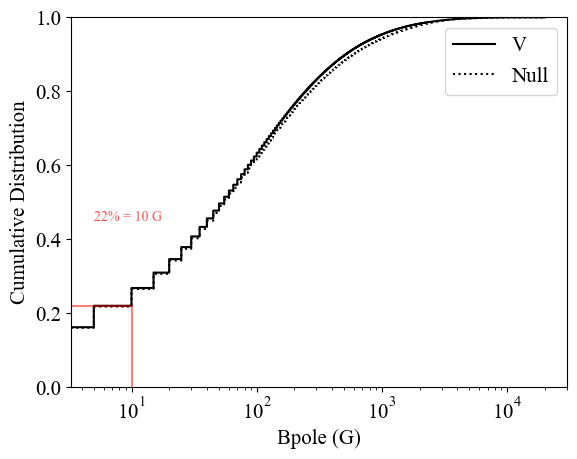

In [37]:
## Full Hybrid


plt.step(bins[:-1],(np.cumsum(hybrid_full_V/sum(hybrid_full_V))),color='black',label='V')

plt.step(bins[:-1],(np.cumsum(hybrid_full_N/sum(hybrid_full_N))),color='black',label='Null',linestyle=':')

#plt.hlines(0.5,0,52,color='r',alpha=0.5)
#plt.vlines(52,0,0.5,color='r',alpha=0.5)
#plt.text(5,0.45,'50% = 52 G',size=10,color='r',alpha=0.7)

plt.hlines(0.22,0,10,color='r',alpha=0.5)
plt.vlines(10,0,0.22,color='r',alpha=0.5)
plt.text(5,0.45,'22% = 10 G',size=10,color='r',alpha=0.7)

plt.legend()
plt.xlabel('Bpole (G)')
plt.ylabel('Cumulative Distribution')
plt.xscale('log',base=10)
plt.ylim(0,1.0)

In [9]:
eps=0.01
bins[np.where((np.cumsum(hybrid_full_V/sum(hybrid_full_V))>=(0.5-eps)) & (np.cumsum(hybrid_full_V/sum(hybrid_full_V))<=(0.5+eps)))]
#bins[np.where((np.cumsum(hybrid_super_V/sum(hybrid_super_V))>=(0.5-eps)) & (np.cumsum(hybrid_super_V/sum(hybrid_super_V))<=(0.5+eps)))]
#bins[np.where((np.cumsum(norm_super_V/sum(norm_super_V))>=(0.5-eps)) & (np.cumsum(norm_super_V/sum(norm_super_V))<=(0.5+eps)))]
#bins[np.where((np.cumsum(hybrid_tweak_V/sum(hybrid_tweak_V))>=(0.5-eps)) & (np.cumsum(hybrid_tweak_V/sum(hybrid_tweak_V))<=(0.5+eps)))]
#bins[np.where((np.cumsum(norm_tweak_V/sum(norm_tweak_V))>=(0.5-eps)) & (np.cumsum(norm_tweak_V/sum(norm_tweak_V))<=(0.5+eps)))]

array([55])

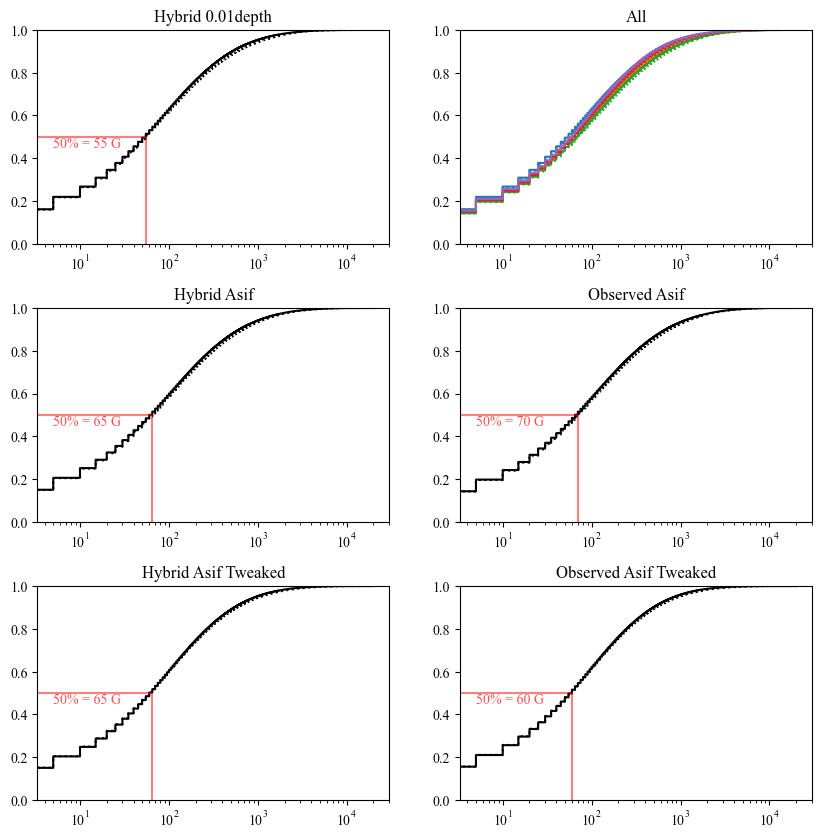

In [10]:
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = "cm"

fig, ax = plt.subplots(3,2,figsize=(10,10))

hf50=bins[np.where((np.cumsum(hybrid_full_V/sum(hybrid_full_V))>=(0.5-eps)) & (np.cumsum(hybrid_full_V/sum(hybrid_full_V))<=(0.5+eps)))][0]
ax[0,0].step(bins[:-1],(np.cumsum(hybrid_full_V/sum(hybrid_full_V))),color='black',label='V')
ax[0,0].step(bins[:-1],(np.cumsum(hybrid_full_N/sum(hybrid_full_N))),color='black',label='Null',linestyle=':')
ax[0,0].set_xscale('log',base=10)
ax[0,0].set_ylim(0,1.0)
ax[0,0].set_title('Hybrid 0.01depth')
ax[0,0].hlines(0.5,0,hf50,color='r',alpha=0.5)
ax[0,0].vlines(hf50,0,0.5,color='r',alpha=0.5)
ax[0,0].text(5,0.45,'50% = {} G'.format(hf50),size=10,color='r',alpha=0.7)

hs50=bins[np.where((np.cumsum(hybrid_super_V/sum(hybrid_super_V))>=(0.5-eps)) & (np.cumsum(hybrid_super_V/sum(hybrid_super_V))<=(0.5+eps)))][0]
ax[1,0].step(bins[:-1],(np.cumsum(hybrid_super_V/sum(hybrid_super_V))),color='black',label='V')
ax[1,0].step(bins[:-1],(np.cumsum(hybrid_super_N/sum(hybrid_super_N))),color='black',label='Null',linestyle=':')
ax[1,0].set_xscale('log',base=10)
ax[1,0].set_ylim(0,1.0)
ax[1,0].set_title('Hybrid Asif')
ax[1,0].hlines(0.5,0,hs50,color='r',alpha=0.5)
ax[1,0].vlines(hs50,0,0.5,color='r',alpha=0.5)
ax[1,0].text(5,0.45,'50% = {} G'.format(hs50),size=10,color='r',alpha=0.7)

ht50=bins[np.where((np.cumsum(hybrid_tweak_V/sum(hybrid_tweak_V))>=(0.5-eps)) & (np.cumsum(hybrid_tweak_V/sum(hybrid_tweak_V))<=(0.5+eps)))][0]
ax[2,0].step(bins[:-1],(np.cumsum(hybrid_tweak_V/sum(hybrid_tweak_V))),color='black',label='V')
ax[2,0].step(bins[:-1],(np.cumsum(hybrid_tweak_N/sum(hybrid_tweak_N))),color='black',label='Null',linestyle=':')
ax[2,0].set_xscale('log',base=10)
ax[2,0].set_ylim(0,1.0)
ax[2,0].set_title('Hybrid Asif Tweaked')
ax[2,0].hlines(0.5,0,ht50,color='r',alpha=0.5)
ax[2,0].vlines(ht50,0,0.5,color='r',alpha=0.5)
ax[2,0].text(5,0.45,'50% = {} G'.format(ht50),size=10,color='r',alpha=0.7)

ns50=bins[np.where((np.cumsum(norm_super_V/sum(norm_super_V))>=(0.5-eps)) & (np.cumsum(norm_super_V/sum(norm_super_V))<=(0.5+eps)))][0]
ax[1,1].step(bins[:-1],(np.cumsum(norm_super_V/sum(norm_super_V))),color='black',label='V')
ax[1,1].step(bins[:-1],(np.cumsum(norm_super_N/sum(norm_super_N))),color='black',label='Null',linestyle=':')
ax[1,1].set_xscale('log',base=10)
ax[1,1].set_ylim(0,1.0)
ax[1,1].set_title('Observed Asif')
ax[1,1].hlines(0.5,0,ns50,color='r',alpha=0.5)
ax[1,1].vlines(ns50,0,0.5,color='r',alpha=0.5)
ax[1,1].text(5,0.45,'50% = {} G'.format(ns50),size=10,color='r',alpha=0.7)

nt50=bins[np.where((np.cumsum(norm_tweak_V/sum(norm_tweak_V))>=(0.5-eps)) & (np.cumsum(norm_tweak_V/sum(norm_tweak_V))<=(0.5+eps)))][0]
ax[2,1].step(bins[:-1],(np.cumsum(norm_tweak_V/sum(norm_tweak_V))),color='black',label='V')
ax[2,1].step(bins[:-1],(np.cumsum(norm_tweak_N/sum(norm_tweak_N))),color='black',label='Null',linestyle=':')
ax[2,1].set_xscale('log',base=10)
ax[2,1].set_ylim(0,1.0)
ax[2,1].set_title('Observed Asif Tweaked')
ax[2,1].hlines(0.5,0,nt50,color='r',alpha=0.5)
ax[2,1].vlines(nt50,0,0.5,color='r',alpha=0.5)
ax[2,1].text(5,0.45,'50% = {} G'.format(nt50),size=10,color='r',alpha=0.7)


ax[0,1].step(bins[:-1],(np.cumsum(hybrid_full_V/sum(hybrid_full_V))),color='C0',label='V')
ax[0,1].step(bins[:-1],(np.cumsum(hybrid_full_N/sum(hybrid_full_N))),color='C0',label='Null',linestyle=':')
ax[0,1].step(bins[:-1],(np.cumsum(hybrid_super_V/sum(hybrid_super_V))),color='C1',label='V')
ax[0,1].step(bins[:-1],(np.cumsum(hybrid_super_N/sum(hybrid_super_N))),color='C1',label='Null',linestyle=':')
ax[0,1].step(bins[:-1],(np.cumsum(norm_super_V/sum(norm_super_V))),color='C2',label='V')
ax[0,1].step(bins[:-1],(np.cumsum(norm_super_N/sum(norm_super_N))),color='C2',label='Null',linestyle=':')
ax[0,1].step(bins[:-1],(np.cumsum(hybrid_tweak_V/sum(hybrid_tweak_V))),color='C3',label='V')
ax[0,1].step(bins[:-1],(np.cumsum(hybrid_tweak_N/sum(hybrid_tweak_N))),color='C3',label='Null',linestyle=':')
ax[0,1].step(bins[:-1],(np.cumsum(norm_tweak_V/sum(norm_tweak_V))),color='C4',label='V')
ax[0,1].step(bins[:-1],(np.cumsum(norm_tweak_N/sum(norm_tweak_N))),color='C4',label='Null',linestyle=':')

ax[0,1].set_xscale('log',base=10)
ax[0,1].set_ylim(0,1.0)
ax[0,1].set_title('All')

plt.subplots_adjust(hspace=0.3)


C:\Users\pjsta\AppData\Local\Temp\ipykernel_30156\3663224202.py:8: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[0,0].set_xlim(0,20000)
C:\Users\pjsta\AppData\Local\Temp\ipykernel_30156\3663224202.py:19: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[1,0].set_xlim(0,20000)
C:\Users\pjsta\AppData\Local\Temp\ipykernel_30156\3663224202.py:30: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[2,0].set_xlim(0,20000)
C:\Users\pjsta\AppData\Local\Temp\ipykernel_30156\3663224202.py:41: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[1,1].set_xlim(0,20000)
C:\Users\pjsta\AppData\Local\Temp\ipykernel_30156\3663224202.py:52: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[2,1].set_xlim(0,20000)


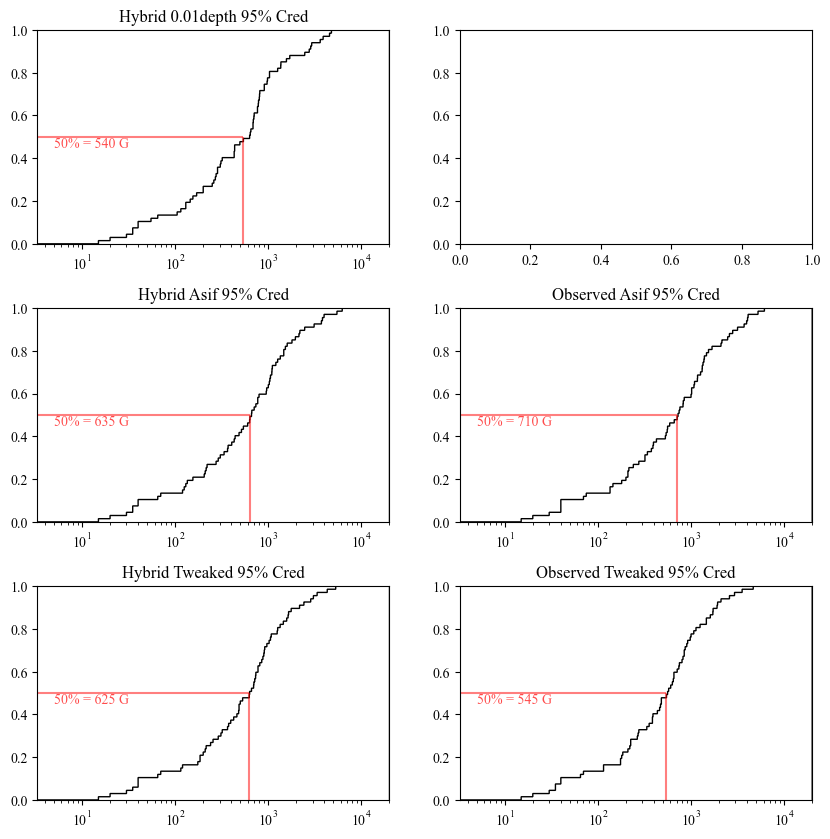

In [11]:
fig, ax = plt.subplots(3,2,figsize=(10,10))

hf50dist=np.cumsum(np.histogram(hybrid_full_V_upper['Lower 95.0%'],bins=bins)[0]/sum(np.histogram(hybrid_full_V_upper['Lower 95.0%'],bins=bins)[0]))
hf50=bins[np.where(((hf50dist)>=(0.5-eps)) & ((hf50dist)<=(0.5+eps)))][0]
ax[0,0].hist(hybrid_full_V_upper['Lower 95.0%'], bins=bins,cumulative=1, density=True,histtype='step',color='k',alpha=1,linewidth=1)
ax[0,0].set_xscale('log',base=10)
ax[0,0].set_ylim(0,1.0)
ax[0,0].set_xlim(0,20000)
ax[0,0].set_title('Hybrid 0.01depth 95% Cred')
ax[0,0].hlines(0.5,0,hf50,color='r',alpha=0.5)
ax[0,0].vlines(hf50,0,0.5,color='r',alpha=0.5)
ax[0,0].text(5,0.45,'50% = {} G'.format(hf50),size=10,color='r',alpha=0.7)

hs50dist=np.cumsum(np.histogram(hybrid_super_V_upper['Lower 95.0%'],bins=bins)[0]/sum(np.histogram(hybrid_super_V_upper['Lower 95.0%'],bins=bins)[0]))
hs50=bins[np.where(((hs50dist)>=(0.5-eps)) & ((hs50dist)<=(0.5+eps)))][0]
ax[1,0].hist(hybrid_super_V_upper['Lower 95.0%'], bins=bins,cumulative=1, density=True,histtype='step',color='k',alpha=1,linewidth=1)
ax[1,0].set_xscale('log',base=10)
ax[1,0].set_ylim(0,1.0)
ax[1,0].set_xlim(0,20000)
ax[1,0].set_title('Hybrid Asif 95% Cred')
ax[1,0].hlines(0.5,0,hs50,color='r',alpha=0.5)
ax[1,0].vlines(hs50,0,0.5,color='r',alpha=0.5)
ax[1,0].text(5,0.45,'50% = {} G'.format(hs50),size=10,color='r',alpha=0.7)

ht50dist=np.cumsum(np.histogram(hybrid_tweak_V_upper['Lower 95.0%'],bins=bins)[0]/sum(np.histogram(hybrid_tweak_V_upper['Lower 95.0%'],bins=bins)[0]))
ht50=bins[np.where(((ht50dist)>=(0.5-eps)) & ((ht50dist)<=(0.5+eps)))][0]
ax[2,0].hist(hybrid_tweak_V_upper['Lower 95.0%'], bins=bins,cumulative=1, density=True,histtype='step',color='k',alpha=1,linewidth=1)
ax[2,0].set_xscale('log',base=10)
ax[2,0].set_ylim(0,1.0)
ax[2,0].set_xlim(0,20000)
ax[2,0].set_title('Hybrid Tweaked 95% Cred')
ax[2,0].hlines(0.5,0,ht50,color='r',alpha=0.5)
ax[2,0].vlines(ht50,0,0.5,color='r',alpha=0.5)
ax[2,0].text(5,0.45,'50% = {} G'.format(ht50),size=10,color='r',alpha=0.7)

ns50dist=np.cumsum(np.histogram(norm_super_V_upper['Lower 95.0%'],bins=bins)[0]/sum(np.histogram(norm_super_V_upper['Lower 95.0%'],bins=bins)[0]))
ns50=bins[np.where(((ns50dist)>=(0.5-eps)) & ((ns50dist)<=(0.5+eps)))][0]
ax[1,1].hist(norm_super_V_upper['Lower 95.0%'], bins=bins,cumulative=1, density=True,histtype='step',color='k',alpha=1,linewidth=1)
ax[1,1].set_xscale('log',base=10)
ax[1,1].set_ylim(0,1.0)
ax[1,1].set_xlim(0,20000)
ax[1,1].set_title('Observed Asif 95% Cred')
ax[1,1].hlines(0.5,0,ns50,color='r',alpha=0.5)
ax[1,1].vlines(ns50,0,0.5,color='r',alpha=0.5)
ax[1,1].text(5,0.45,'50% = {} G'.format(ns50),size=10,color='r',alpha=0.7)

nt50dist=np.cumsum(np.histogram(norm_tweak_V_upper['Lower 95.0%'],bins=bins)[0]/sum(np.histogram(norm_tweak_V_upper['Lower 95.0%'],bins=bins)[0]))
nt50=bins[np.where(((nt50dist)>=(0.5-eps)) & ((nt50dist)<=(0.5+eps)))][0]
ax[2,1].hist(norm_tweak_V_upper['Lower 95.0%'], bins=bins,cumulative=1, density=True,histtype='step',color='k',alpha=1,linewidth=1)
ax[2,1].set_xscale('log',base=10)
ax[2,1].set_ylim(0,1.0)
ax[2,1].set_xlim(0,20000)
ax[2,1].set_title('Observed Tweaked 95% Cred')
ax[2,1].hlines(0.5,0,nt50,color='r',alpha=0.5)
ax[2,1].vlines(nt50,0,0.5,color='r',alpha=0.5)
ax[2,1].text(5,0.45,'50% = {} G'.format(nt50),size=10,color='r',alpha=0.7)

plt.subplots_adjust(hspace=0.3)

C:\Users\pjsta\AppData\Local\Temp\ipykernel_30156\1621640797.py:8: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[0,0].set_xlim(0,20000)
C:\Users\pjsta\AppData\Local\Temp\ipykernel_30156\1621640797.py:19: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[1,0].set_xlim(0,20000)
C:\Users\pjsta\AppData\Local\Temp\ipykernel_30156\1621640797.py:30: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[2,0].set_xlim(0,20000)
C:\Users\pjsta\AppData\Local\Temp\ipykernel_30156\1621640797.py:41: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[1,1].set_xlim(0,20000)
C:\Users\pjsta\AppData\Local\Temp\ipykernel_30156\1621640797.py:52: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[2,1].set_xlim(0,20000)


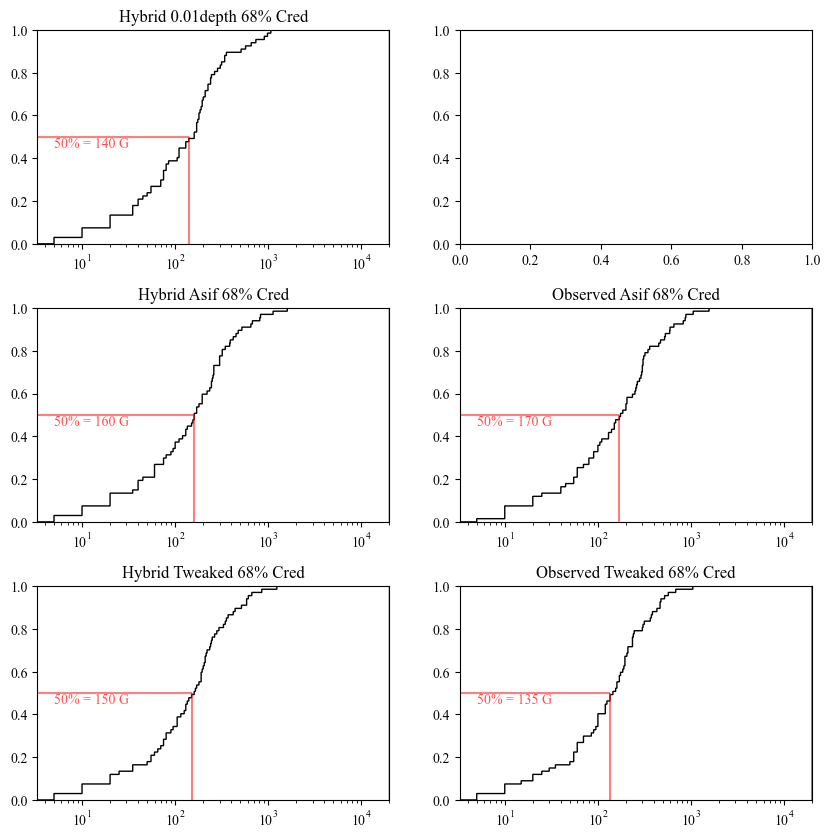

In [12]:
fig, ax = plt.subplots(3,2,figsize=(10,10))

hf50dist=np.cumsum(np.histogram(hybrid_full_V_upper['Lower 99.7%'],bins=bins)[0]/sum(np.histogram(hybrid_full_V_upper['Lower 99.7%'],bins=bins)[0]))
hf50=bins[np.where(((hf50dist)>=(0.5-eps)) & ((hf50dist)<=(0.5+eps)))][0]
ax[0,0].hist(hybrid_full_V_upper['Lower 99.7%'], bins=bins,cumulative=1, density=True,histtype='step',color='k',alpha=1,linewidth=1)
ax[0,0].set_xscale('log',base=10)
ax[0,0].set_ylim(0,1.0)
ax[0,0].set_xlim(0,20000)
ax[0,0].set_title('Hybrid 0.01depth 68% Cred')
ax[0,0].hlines(0.5,0,hf50,color='r',alpha=0.5)
ax[0,0].vlines(hf50,0,0.5,color='r',alpha=0.5)
ax[0,0].text(5,0.45,'50% = {} G'.format(hf50),size=10,color='r',alpha=0.7)

hs50dist=np.cumsum(np.histogram(hybrid_super_V_upper['Lower 99.7%'],bins=bins)[0]/sum(np.histogram(hybrid_super_V_upper['Lower 99.7%'],bins=bins)[0]))
hs50=bins[np.where(((hs50dist)>=(0.5-eps)) & ((hs50dist)<=(0.5+eps)))][0]
ax[1,0].hist(hybrid_super_V_upper['Lower 99.7%'], bins=bins,cumulative=1, density=True,histtype='step',color='k',alpha=1,linewidth=1)
ax[1,0].set_xscale('log',base=10)
ax[1,0].set_ylim(0,1.0)
ax[1,0].set_xlim(0,20000)
ax[1,0].set_title('Hybrid Asif 68% Cred')
ax[1,0].hlines(0.5,0,hs50,color='r',alpha=0.5)
ax[1,0].vlines(hs50,0,0.5,color='r',alpha=0.5)
ax[1,0].text(5,0.45,'50% = {} G'.format(hs50),size=10,color='r',alpha=0.7)

ht50dist=np.cumsum(np.histogram(hybrid_tweak_V_upper['Lower 99.7%'],bins=bins)[0]/sum(np.histogram(hybrid_tweak_V_upper['Lower 99.7%'],bins=bins)[0]))
ht50=bins[np.where(((ht50dist)>=(0.5-eps)) & ((ht50dist)<=(0.5+eps)))][0]
ax[2,0].hist(hybrid_tweak_V_upper['Lower 99.7%'], bins=bins,cumulative=1, density=True,histtype='step',color='k',alpha=1,linewidth=1)
ax[2,0].set_xscale('log',base=10)
ax[2,0].set_ylim(0,1.0)
ax[2,0].set_xlim(0,20000)
ax[2,0].set_title('Hybrid Tweaked 68% Cred')
ax[2,0].hlines(0.5,0,ht50,color='r',alpha=0.5)
ax[2,0].vlines(ht50,0,0.5,color='r',alpha=0.5)
ax[2,0].text(5,0.45,'50% = {} G'.format(ht50),size=10,color='r',alpha=0.7)

ns50dist=np.cumsum(np.histogram(norm_super_V_upper['Lower 99.7%'],bins=bins)[0]/sum(np.histogram(norm_super_V_upper['Lower 99.7%'],bins=bins)[0]))
ns50=bins[np.where(((ns50dist)>=(0.5-eps)) & ((ns50dist)<=(0.5+eps)))][0]
ax[1,1].hist(norm_super_V_upper['Lower 99.7%'], bins=bins,cumulative=1, density=True,histtype='step',color='k',alpha=1,linewidth=1)
ax[1,1].set_xscale('log',base=10)
ax[1,1].set_ylim(0,1.0)
ax[1,1].set_xlim(0,20000)
ax[1,1].set_title('Observed Asif 68% Cred')
ax[1,1].hlines(0.5,0,ns50,color='r',alpha=0.5)
ax[1,1].vlines(ns50,0,0.5,color='r',alpha=0.5)
ax[1,1].text(5,0.45,'50% = {} G'.format(ns50),size=10,color='r',alpha=0.7)

nt50dist=np.cumsum(np.histogram(norm_tweak_V_upper['Lower 99.7%'],bins=bins)[0]/sum(np.histogram(norm_tweak_V_upper['Lower 99.7%'],bins=bins)[0]))
nt50=bins[np.where(((nt50dist)>=(0.5-eps)) & ((nt50dist)<=(0.5+eps)))][0]
ax[2,1].hist(norm_tweak_V_upper['Lower 99.7%'], bins=bins,cumulative=1, density=True,histtype='step',color='k',alpha=1,linewidth=1)
ax[2,1].set_xscale('log',base=10)
ax[2,1].set_ylim(0,1.0)
ax[2,1].set_xlim(0,20000)
ax[2,1].set_title('Observed Tweaked 68% Cred')
ax[2,1].hlines(0.5,0,nt50,color='r',alpha=0.5)
ax[2,1].vlines(nt50,0,0.5,color='r',alpha=0.5)
ax[2,1].text(5,0.45,'50% = {} G'.format(nt50),size=10,color='r',alpha=0.7)

plt.subplots_adjust(hspace=0.3)

C:\Users\pjsta\AppData\Local\Temp\ipykernel_30156\2895019654.py:8: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[0,0].set_xlim(0,20000)
C:\Users\pjsta\AppData\Local\Temp\ipykernel_30156\2895019654.py:19: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[1,0].set_xlim(0,20000)
C:\Users\pjsta\AppData\Local\Temp\ipykernel_30156\2895019654.py:30: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[2,0].set_xlim(0,20000)
C:\Users\pjsta\AppData\Local\Temp\ipykernel_30156\2895019654.py:41: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[1,1].set_xlim(0,20000)
C:\Users\pjsta\AppData\Local\Temp\ipykernel_30156\2895019654.py:52: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[2,1].set_xlim(0,20000)


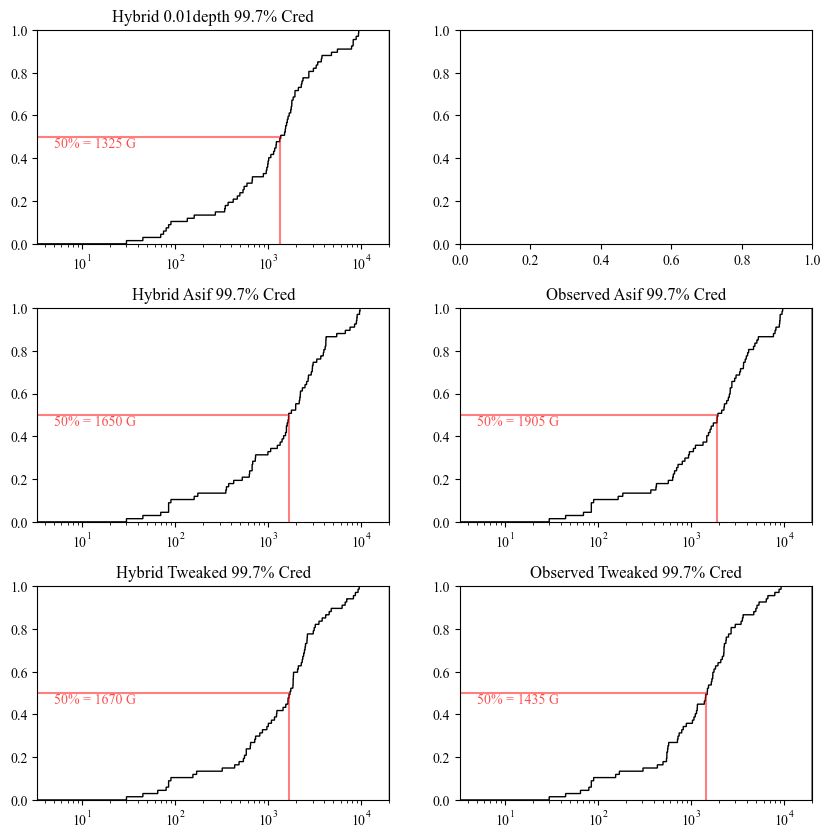

In [13]:
fig, ax = plt.subplots(3,2,figsize=(10,10))

hf50dist=np.cumsum(np.histogram(hybrid_full_V_upper['Lower 68.0%'],bins=bins)[0]/sum(np.histogram(hybrid_full_V_upper['Lower 68.0%'],bins=bins)[0]))
hf50=bins[np.where(((hf50dist)>=(0.5-eps)) & ((hf50dist)<=(0.5+eps)))][0]
ax[0,0].hist(hybrid_full_V_upper['Lower 68.0%'], bins=bins,cumulative=1, density=True,histtype='step',color='k',alpha=1,linewidth=1)
ax[0,0].set_xscale('log',base=10)
ax[0,0].set_ylim(0,1.0)
ax[0,0].set_xlim(0,20000)
ax[0,0].set_title('Hybrid 0.01depth 99.7% Cred')
ax[0,0].hlines(0.5,0,hf50,color='r',alpha=0.5)
ax[0,0].vlines(hf50,0,0.5,color='r',alpha=0.5)
ax[0,0].text(5,0.45,'50% = {} G'.format(hf50),size=10,color='r',alpha=0.7)

hs50dist=np.cumsum(np.histogram(hybrid_super_V_upper['Lower 68.0%'],bins=bins)[0]/sum(np.histogram(hybrid_super_V_upper['Lower 68.0%'],bins=bins)[0]))
hs50=bins[np.where(((hs50dist)>=(0.5-eps)) & ((hs50dist)<=(0.5+eps)))][0]
ax[1,0].hist(hybrid_super_V_upper['Lower 68.0%'], bins=bins,cumulative=1, density=True,histtype='step',color='k',alpha=1,linewidth=1)
ax[1,0].set_xscale('log',base=10)
ax[1,0].set_ylim(0,1.0)
ax[1,0].set_xlim(0,20000)
ax[1,0].set_title('Hybrid Asif 99.7% Cred')
ax[1,0].hlines(0.5,0,hs50,color='r',alpha=0.5)
ax[1,0].vlines(hs50,0,0.5,color='r',alpha=0.5)
ax[1,0].text(5,0.45,'50% = {} G'.format(hs50),size=10,color='r',alpha=0.7)

ht50dist=np.cumsum(np.histogram(hybrid_tweak_V_upper['Lower 68.0%'],bins=bins)[0]/sum(np.histogram(hybrid_tweak_V_upper['Lower 68.0%'],bins=bins)[0]))
ht50=bins[np.where(((ht50dist)>=(0.5-eps)) & ((ht50dist)<=(0.5+eps)))][0]
ax[2,0].hist(hybrid_tweak_V_upper['Lower 68.0%'], bins=bins,cumulative=1, density=True,histtype='step',color='k',alpha=1,linewidth=1)
ax[2,0].set_xscale('log',base=10)
ax[2,0].set_ylim(0,1.0)
ax[2,0].set_xlim(0,20000)
ax[2,0].set_title('Hybrid Tweaked 99.7% Cred')
ax[2,0].hlines(0.5,0,ht50,color='r',alpha=0.5)
ax[2,0].vlines(ht50,0,0.5,color='r',alpha=0.5)
ax[2,0].text(5,0.45,'50% = {} G'.format(ht50),size=10,color='r',alpha=0.7)

ns50dist=np.cumsum(np.histogram(norm_super_V_upper['Lower 68.0%'],bins=bins)[0]/sum(np.histogram(norm_super_V_upper['Lower 68.0%'],bins=bins)[0]))
ns50=bins[np.where(((ns50dist)>=(0.5-eps)) & ((ns50dist)<=(0.5+eps)))][0]
ax[1,1].hist(norm_super_V_upper['Lower 68.0%'], bins=bins,cumulative=1, density=True,histtype='step',color='k',alpha=1,linewidth=1)
ax[1,1].set_xscale('log',base=10)
ax[1,1].set_ylim(0,1.0)
ax[1,1].set_xlim(0,20000)
ax[1,1].set_title('Observed Asif 99.7% Cred')
ax[1,1].hlines(0.5,0,ns50,color='r',alpha=0.5)
ax[1,1].vlines(ns50,0,0.5,color='r',alpha=0.5)
ax[1,1].text(5,0.45,'50% = {} G'.format(ns50),size=10,color='r',alpha=0.7)

nt50dist=np.cumsum(np.histogram(norm_tweak_V_upper['Lower 68.0%'],bins=bins)[0]/sum(np.histogram(norm_tweak_V_upper['Lower 68.0%'],bins=bins)[0]))
nt50=bins[np.where(((nt50dist)>=(0.5-eps)) & ((nt50dist)<=(0.5+eps)))][0]
ax[2,1].hist(norm_tweak_V_upper['Lower 68.0%'], bins=bins,cumulative=1, density=True,histtype='step',color='k',alpha=1,linewidth=1)
ax[2,1].set_xscale('log',base=10)
ax[2,1].set_ylim(0,1.0)
ax[2,1].set_xlim(0,20000)
ax[2,1].set_title('Observed Tweaked 99.7% Cred')
ax[2,1].hlines(0.5,0,nt50,color='r',alpha=0.5)
ax[2,1].vlines(nt50,0,0.5,color='r',alpha=0.5)
ax[2,1].text(5,0.45,'50% = {} G'.format(nt50),size=10,color='r',alpha=0.7)

plt.subplots_adjust(hspace=0.3)

## 2. Credible Region Hists

Note: labels are backwards in csv. Lower 99.7% is actually the 68.0% bound and Lower 68.0% is the 99.7% bound

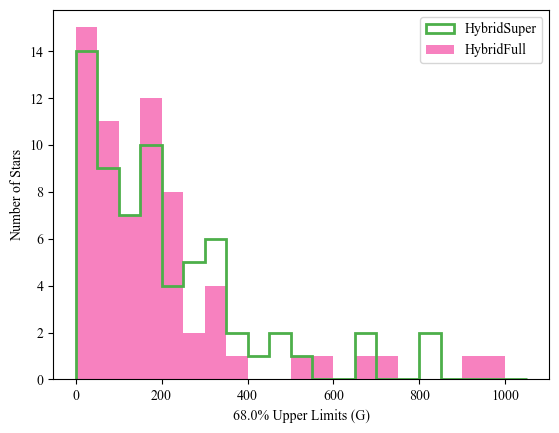

NameError: name 'model2' is not defined

In [14]:
#68.0% Histogram
bins=np.arange(0,hybrid_full_V_upper['Lower 99.7%'].max(),50)
plt.hist(hybrid_super_V_upper['Lower 99.7%'],bins=bins,histtype='step',label='HybridSuper',linewidth=2,color='#4daf4a')
plt.hist(hybrid_full_V_upper['Lower 99.7%'],bins=bins,label='HybridFull',color='#f781bf')
#plt.axvline(np.median(model2['Lower 99.7%']),color='darkgreen',linewidth=3,alpha=1,linestyle='dashed', label='NormSuperClean Median')
#plt.axvline(np.mean(model2['Lower 99.7%']),color='darkgreen',linewidth=3,alpha=1,linestyle='solid', label='NormSuperClean Mean')
#plt.axvline(np.median(model0['Lower 99.7%']),color='#984ea3',linewidth=3,alpha=1,linestyle='dashed', label='HybridFull Median')
#plt.axvline(np.mean(model0['Lower 99.7%']),color='#984ea3',linewidth=3,alpha=1,linestyle='solid', label='HybridFull Mean')
plt.legend()
plt.xlabel('68.0% Upper Limits (G)')
plt.ylabel('Number of Stars')
plt.show()

#print(np.median(model2['Lower 68.0%'])/np.median(model0['Lower 68.0%']))
#print(np.mean(model2['Lower 68.0%'])/np.mean(model0['Lower 68.0%']))

#95.0% Histogram
bins=np.arange(0,model2['Lower 95.0%'].max(),300)
plt.hist(model2['Lower 95.0%'],bins=bins,histtype='step',label='NormSuperClean',linewidth=2,color='#4daf4a')
plt.hist(model1['Lower 95.0%'],bins=bins,label='HybridFull',color='#f781bf')
#plt.axvline(np.median(model2['Lower 99.7%']),color='darkgreen',linewidth=3,alpha=1,linestyle='dashed', label='NormSuperClean Median')
#plt.axvline(np.mean(model2['Lower 99.7%']),color='darkgreen',linewidth=3,alpha=1,linestyle='solid', label='NormSuperClean Mean')
#plt.axvline(np.median(model0['Lower 99.7%']),color='#984ea3',linewidth=3,alpha=1,linestyle='dashed', label='HybridFull Median')
#plt.axvline(np.mean(model0['Lower 99.7%']),color='#984ea3',linewidth=3,alpha=1,linestyle='solid', label='HybridFull Mean')
plt.legend()
plt.xlabel('95.0% Upper Limits (G)')
plt.ylabel('Number of Stars')
plt.show()

#99.7% Histogram
bins=np.arange(0,model2['Lower 68.0%'].max(),500)
plt.hist(model2['Lower 68.0%'],bins=bins,histtype='step',label='NormSuperClean',linewidth=2,color='#4daf4a')
plt.hist(model1['Lower 68.0%'],bins=bins,label='HybridFull',color='#f781bf')
#plt.axvline(np.median(model2['Lower 99.7%']),color='darkgreen',linewidth=3,alpha=1,linestyle='dashed', label='NormSuperClean Median')
#plt.axvline(np.mean(model2['Lower 99.7%']),color='darkgreen',linewidth=3,alpha=1,linestyle='solid', label='NormSuperClean Mean')
#plt.axvline(np.median(model0['Lower 99.7%']),color='#984ea3',linewidth=3,alpha=1,linestyle='dashed', label='HybridFull Median')
#plt.axvline(np.mean(model0['Lower 99.7%']),color='#984ea3',linewidth=3,alpha=1,linestyle='solid', label='HybridFull Mean')
plt.legend()
plt.xlabel('99.7% Upper Limits (G)')
plt.ylabel('Number of Stars')
plt.show()

In [ ]:
model2

,Unnamed: 0,Lower 99.7%,Upper 99.7%,Lower 95.0%,Upper 95.0%,Lower 68.0%,Upper 68.0%
0,hd10144,216.744198,0.0,573.265504,0.0,691.589343,0.0
1,hd10516,293.838155,0.0,821.637354,0.0,988.208662,0.0
2,hd105435,457.362123,0.0,1628.585288,0.0,2067.767855,0.0
3,hd109387,7.064852,0.0,29.055449,0.0,77.663623,0.0
4,hd110335,592.731162,0.0,2404.199109,0.0,3144.436429,0.0
...,...,...,...,...,...,...,...
62,hd77320,983.867758,0.0,6470.377373,0.0,9642.396577,0.0
63,hd78764,327.993234,0.0,1160.999030,0.0,1476.827782,0.0
64,hd89884,937.568099,0.0,6304.634444,0.0,9625.896167,0.0
65,hd91120,558.894500,0.0,2248.787283,0.0,2947.610637,0.0


## 4. Well Behaved Stars Comparisons

In [28]:

WB=['hd10144','hd23302','hd23630','hd33328','hd138749','hd164284','hd170783','hd175869','hd189687','hd191610']
hybrid_fullWB=[]
for i in range(hybrid_full_V_upper['Lower 99.7%'].size):
    for j in range(len(WB)):
        if hybrid_full_V_upper['Unnamed: 0'][i]==WB[j]:
            print(WB[j])
            hybrid_fullWB.append(hybrid_full_V_upper['Lower 99.7%'][i])

hybrid_superWB=[]
for i in range(hybrid_super_V_upper['Lower 99.7%'].size):
    for j in range(len(WB)):
        if hybrid_super_V_upper['Unnamed: 0'][i]==WB[j]:
            print(WB[j])
            hybrid_superWB.append(hybrid_super_V_upper['Lower 99.7%'][i])

hybrid_tweakWB=[]
for i in range(hybrid_tweak_V_upper['Lower 99.7%'].size):
    for j in range(len(WB)):
        if hybrid_tweak_V_upper['Unnamed: 0'][i]==WB[j]:
            print(WB[j])
            hybrid_tweakWB.append(hybrid_tweak_V_upper['Lower 99.7%'][i])

norm_superWB=[]
for i in range(norm_super_V_upper['Lower 99.7%'].size):
    for j in range(len(WB)):
        if norm_super_V_upper['Unnamed: 0'][i]==WB[j]:
            print(WB[j])
            norm_superWB.append(norm_super_V_upper['Lower 99.7%'][i])

norm_tweakWB=[]
for i in range(norm_tweak_V_upper['Lower 99.7%'].size):
    for j in range(len(WB)):
        if norm_tweak_V_upper['Unnamed: 0'][i]==WB[j]:
            print(WB[j])
            norm_tweakWB.append(norm_tweak_V_upper['Lower 99.7%'][i])


hd10144
hd138749
hd164284
hd170783
hd175869
hd189687
hd191610
hd23302
hd23630
hd33328
hd10144
hd138749
hd164284
hd170783
hd175869
hd189687
hd191610
hd23302
hd23630
hd33328
hd10144
hd138749
hd164284
hd170783
hd175869
hd189687
hd191610
hd23302
hd23630
hd33328
hd10144
hd138749
hd164284
hd170783
hd175869
hd189687
hd191610
hd23302
hd23630
hd33328
hd10144
hd138749
hd164284
hd170783
hd175869
hd189687
hd191610
hd23302
hd23630
hd33328


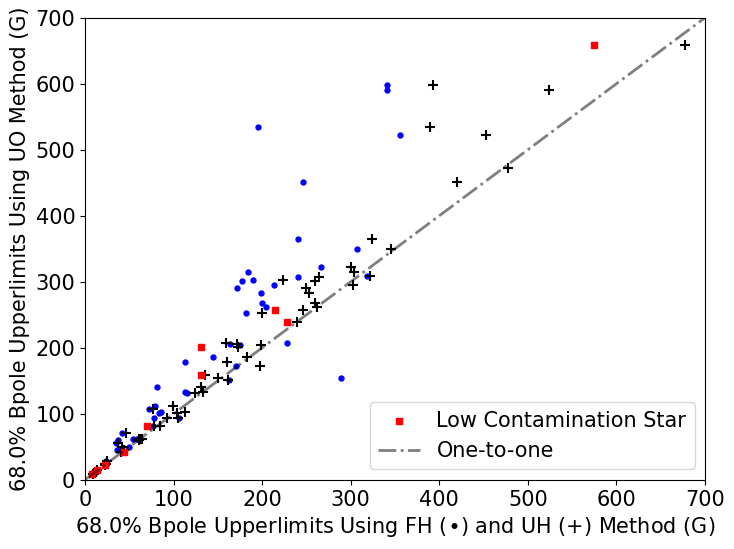

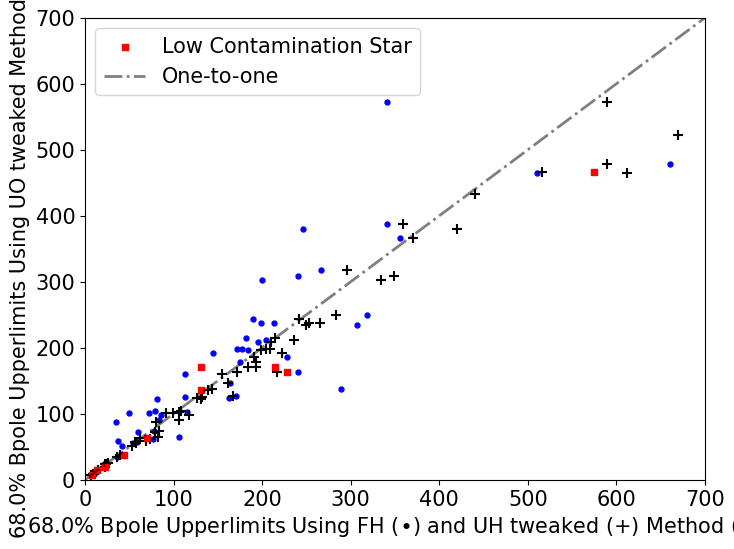

In [31]:
#plt.scatter(model0['Lower 68.0%'],model2['Lower 68.0%'],label='99.7%')
#plt.scatter(model0['Lower 95.0%'],model2['Lower 95.0%'],label='95.0%')

fig, ax = plt.subplots(1,1, figsize=(8,6))
plt.rcParams.update({'font.size': 15})
plt.scatter(hybrid_full_V_upper['Lower 99.7%'],norm_super_V_upper['Lower 99.7%'],color='b',s=50,marker='.')
plt.scatter(hybrid_super_V_upper['Lower 99.7%'],norm_super_V_upper['Lower 99.7%'],color='black',marker='+',s=50)
plt.scatter(hybrid_fullWB,norm_superWB,label='Low Contamination Star',color='r',marker='s',s=15)
plt.plot([0,1000],[0,1000],label='One-to-one',c='black',linestyle='-.',linewidth=2,alpha=0.5)
plt.xlim(0,700)
plt.ylim(0,700)
plt.xlabel(r'68.0% Bpole Upperlimits Using FH ($\bullet$) and UH ($+$) Method (G)')
plt.ylabel('68.0% Bpole Upperlimits Using UO Method (G)')
plt.legend()
plt.show()


fig, ax = plt.subplots(1,1, figsize=(8,6))
plt.rcParams.update({'font.size': 15})
plt.scatter(hybrid_full_V_upper['Lower 99.7%'],norm_tweak_V_upper['Lower 99.7%'],color='b',s=50,marker='.')
plt.scatter(hybrid_tweak_V_upper['Lower 99.7%'],norm_tweak_V_upper['Lower 99.7%'],color='black',marker='+',s=50)
plt.scatter(hybrid_fullWB,norm_tweakWB,label='Low Contamination Star',color='r',marker='s',s=15)
plt.plot([0,1000],[0,1000],label='One-to-one',c='black',linestyle='-.',linewidth=2,alpha=0.5)
plt.xlim(0,700)
plt.ylim(0,700)
plt.xlabel(r'68.0% Bpole Upperlimits Using FH ($\bullet$) and UH tweaked ($+$) Method (G)')
plt.ylabel('68.0% Bpole Upperlimits Using UO tweaked Method (G)')
plt.legend()
plt.show()

## 5. Comparisons with OB stars

In [9]:
models=['hybrid_maskdepth0.02_tellClean','hybrid_SuperCleanAsif+tellClean',
 'normalized_SuperCleanAsif+tellClean']

modelall1=pd.read_csv('{}04-Bz-calculations/{}_the38.csv'.format(path,models[0]))
v_sigall1=np.abs(modelall1.groupby("Star").median()['V bz sig (G)'])

modelall3=pd.read_csv('{}04-Bz-calculations/{}_the38.csv'.format(path,models[2]))
v_sigall3=np.abs(modelall3.groupby("Star").median()['V bz sig (G)'])

modelall2=pd.read_csv('{}04-Bz-calculations/{}_the38.csv'.format(path,models[1]))
v_sigall2=np.abs(modelall2.groupby("Star").median()['V bz sig (G)'])

sheet_id = '1Hle6DgGcse92VdarqZma1nje5xYwlJwnAkMStMba1xU'
sheet_name = 'Bstars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData_B=pd.read_csv(url)


MBstarname=[]
for i in range(StarData_B['sigma'].size):
  if np.isnan(StarData_B['sigma'][i])==False:
    if StarData_B['Det Flag'][i]!='ND':
      MBstarname.append(StarData_B['HD Num'][i])

MBstar_bl=[]
for i in range(len(MBstarname)):
    MBstar_bl.append(StarData_B.groupby("HD Num").median()["Bl"][int(MBstarname[i])])

MBstar_sig=[]
for i in range(len(MBstarname)):
    MBstar_sig.append(StarData_B.groupby("HD Num").median()["sigma"][int(MBstarname[i])])


FileNotFoundError: [Errno 2] No such file or directory: 'G:/Shared drives/BeStarsMiMeS/ScienceFiles/04-Bz-calculations/hybrid_maskdepth0.02_tellClean_the38.csv'

C:\Users\pjsta\AppData\Local\Temp\ipykernel_29084\3109074634.py:44: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,20000)


(3.302683865249019, 20000)

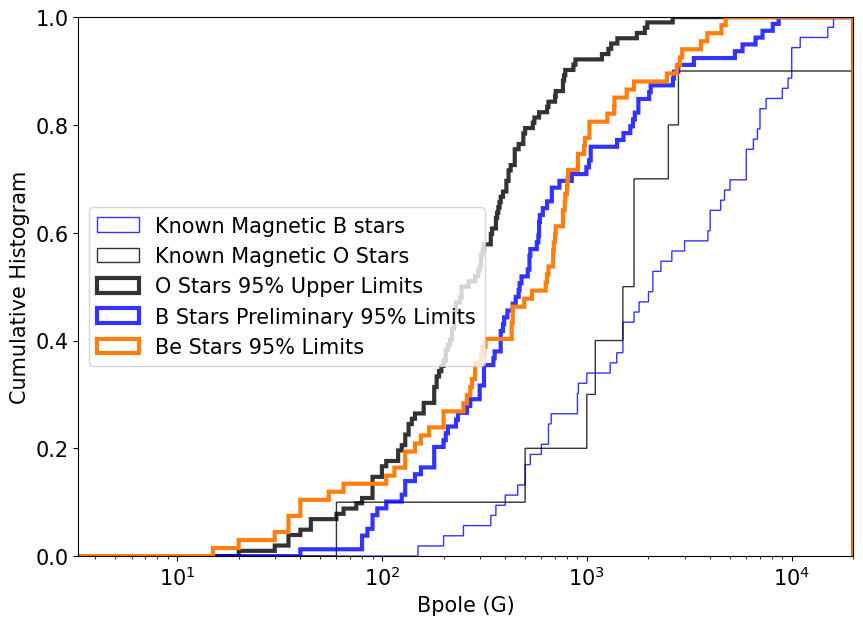

In [108]:

import pandas as pd
sheet_id = '1d5_XPFfdn-WQmM59VFjkZMHmiImjC46yeaRz9fulqpU'
sheet_name = 'Sheet1'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Bstars_prelim=pd.read_csv(url)
Bstars_prelim_B=Bstars_prelim['V_95_UB'].values[np.where(Bstars_prelim['V_95_LB']==0)]


bins=np.arange(0,20000+5,5)
Petit2013O=[1000,1700,1100,2500,20000,2800,500,1500,1700,60]
Petit2013B=[200,650,460,670,1500,1500,2100,360,1400,250,500,6000,400,6500,2100,16000,1500,4000,910,6000,9600,4700,3900,15000,600,650,1800,530,340,1700,900,1000,6000,900,11000,2600,10000,7000,10000,500,5000,150,9000,2000,7500,3000,6800,7000,4500,4000,21000,2300,1300,10000]


Petit2019O=pd.read_csv('C://Users/pjsta/asu.tsv', sep='\t',header=None)
Petit2019O


plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(1,1, figsize=(10,7))
#plt.step(bins[:-1],(np.cumsum(histtotal0/sum(histtotal0))),color='black',label='Be Stars')

plt.hist(Petit2013B,bins=bins,cumulative=True,histtype='step',density=True,color='b',alpha=0.8,label='Known Magnetic B stars')
plt.hist(Petit2013O,bins=bins,cumulative=True,histtype='step',density=True,color='black',alpha=0.8,label='Known Magnetic O Stars')
plt.hist(Petit2019O[4],bins=bins,cumulative=1,histtype='step',density=True,color='black',alpha=0.8,label='O Stars 95% Upper Limits',linewidth=3)

plt.hist(Bstars_prelim_B,bins=bins,cumulative=1,histtype='step',density=True,color='b',alpha=0.8,label='B Stars Preliminary 95% Limits',linewidth=3)#,linestyle='--')

#plt.hist(model0['Lower 99.7%'], bins=bins,cumulative=True, density=True,histtype='step',color='orange',alpha=0.5)

plt.hist(hybrid_full_V_upper['Lower 95.0%'], bins=bins,cumulative=1, density=True,histtype='step',color='C1',alpha=1,label='Be Stars 95% Limits',linewidth=3)

#plt.hist(hybrid_full_V_upper['Lower 99.7%'], bins=bins,cumulative=True, density=True,histtype='step',color='orange',alpha=0.5)

#plt.hlines(0.5,0,600,color='red',linestyles='--')
#plt.vlines([600],0,0.5,color='red',linestyles='--')
#plt.hlines(0.14,0,100)


plt.legend(loc=6)
plt.xlabel('Bpole (G)')
plt.ylabel('Cumulative Histogram')
plt.xscale('log',base=10)
plt.ylim(0,1.0)
plt.xlim(0,20000)
#plt.xlim(0,20000)


## Binning By vsini

In [74]:
sheet_id = '1Hle6DgGcse92VdarqZma1nje5xYwlJwnAkMStMba1xU'
sheet_name = 'Bstars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData3=pd.read_csv(url)

stars=StarData3.groupby("HD Num",as_index=False).median()

Bstar_vsini=np.array([])
Bstar_T=np.array([])
name2=np.array([])
for i in range(stars['HD Num'].size):
    Bstar_vsini = np.append(Bstar_vsini,stars['vsini'][i])
    Bstar_T = np.append(Bstar_T,stars['Masktemp'][i])
    name2 = np.append(name2,stars['HD Num'])

C:\Users\pjsta\AppData\Local\Temp\ipykernel_29084\925617036.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stars=StarData3.groupby("HD Num",as_index=False).median()


In [90]:
vsinibin=np.arange(0,440,40)
rotarr=[]
namearr=[]
upperarr=[]
for lower in vsinibin:
    rotarr.append(Be_vsini[np.where((Be_vsini>=lower) & (Be_vsini<lower+40))])
    namearr.append(name[np.where((Be_vsini>=lower) & (Be_vsini<lower+40))])
    upper=[]
    for i in name[np.where((Be_vsini>=lower) & (Be_vsini<lower+40))]:
        for j in range(hybrid_full_V_upper['Unnamed: 0'].size):
            if i==hybrid_full_V_upper['Unnamed: 0'][j]:
                upper.append(hybrid_full_V_upper['Lower 95.0%'][j])
    upperarr.append(upper)

rotarr2=[]
namearr2=[]
upperarr2=[]
for lower in vsinibin:
    rotarr2.append(Bstar_vsini[np.where((Bstar_vsini>=lower) & (Bstar_vsini<lower+40))])
    namearr2.append(name2[np.where((Bstar_vsini>=lower) & (Bstar_vsini<lower+40))])
    upper=[]
    for i in name2[np.where((Bstar_vsini>=lower) & (Bstar_vsini<lower+40))]:
        for j in range(Bstars_prelim['Star_Name'].size):
            if str(int(i))==Bstars_prelim['Star_Name'][j].split('D')[1]:
                upper.append(Bstars_prelim['V_95_UB'][j])
    upperarr2.append(upper)

C:\Users\pjsta\AppData\Local\Temp\ipykernel_29084\2413852910.py:17: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,20000)


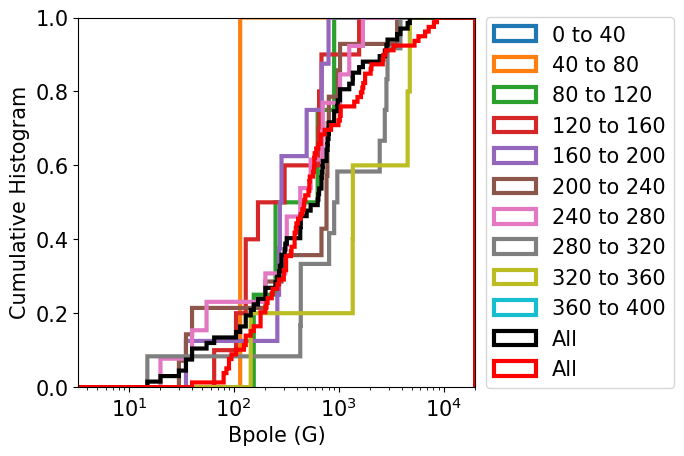

In [100]:
bins=np.arange(0,20000+5,5)

fig = plt.figure()
ax = plt.subplot(111)

for i in range(len(upperarr)-1):
    ax.hist(upperarr[i], bins=bins,cumulative=1, density=True,histtype='step',alpha=1,label='{} to {}'.format(vsinibin[i],vsinibin[i+1]),linewidth=3)

ax.hist(hybrid_full_V_upper['Lower 95.0%'], bins=bins,cumulative=1, density=True,histtype='step',color='k',alpha=1,label='All',linewidth=3)

ax.hist(Bstars_prelim_B, bins=bins,cumulative=1, density=True,histtype='step',color='r',alpha=1,label='All',linewidth=3)

ax.set_xlabel('Bpole (G)')
ax.set_ylabel('Cumulative Histogram')
ax.set_xscale('log',base=10)
ax.set_ylim(0,1.0)
ax.set_xlim(0,20000)


# Shrink current axis by 20%
box =ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

C:\Users\pjsta\AppData\Local\Temp\ipykernel_29084\2633227789.py:17: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,20000)


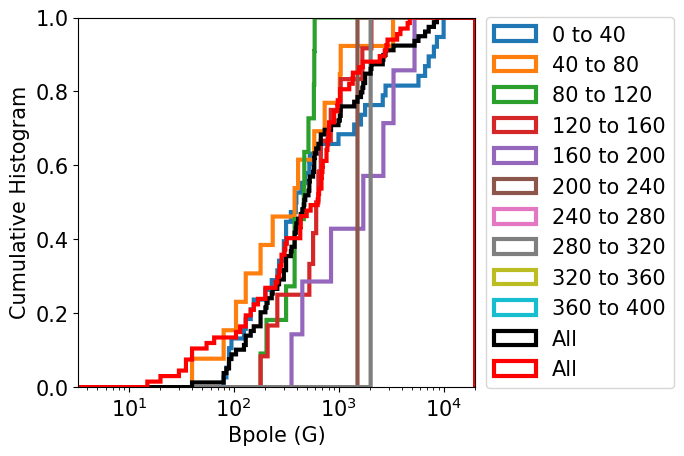

In [99]:
bins=np.arange(0,20000+5,5)

fig = plt.figure()
ax = plt.subplot(111)

for i in range(len(upperarr2)-1):
    ax.hist(upperarr2[i], bins=bins,cumulative=1, density=True,histtype='step',alpha=1,label='{} to {}'.format(vsinibin[i],vsinibin[i+1]),linewidth=3)

ax.hist(Bstars_prelim_B, bins=bins,cumulative=1, density=True,histtype='step',color='k',alpha=1,label='All',linewidth=3)

ax.hist(hybrid_full_V_upper['Lower 95.0%'], bins=bins,cumulative=1, density=True,histtype='step',color='r',alpha=1,label='All',linewidth=3)

ax.set_xlabel('Bpole (G)')
ax.set_ylabel('Cumulative Histogram')
ax.set_xscale('log',base=10)
ax.set_ylim(0,1.0)
ax.set_xlim(0,20000)


# Shrink current axis by 20%
box =ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## ...

C:\Users\pjsta\AppData\Local\Temp\ipykernel_11428\3719022655.py:39: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,20000)


(3.302683865249019, 20000)

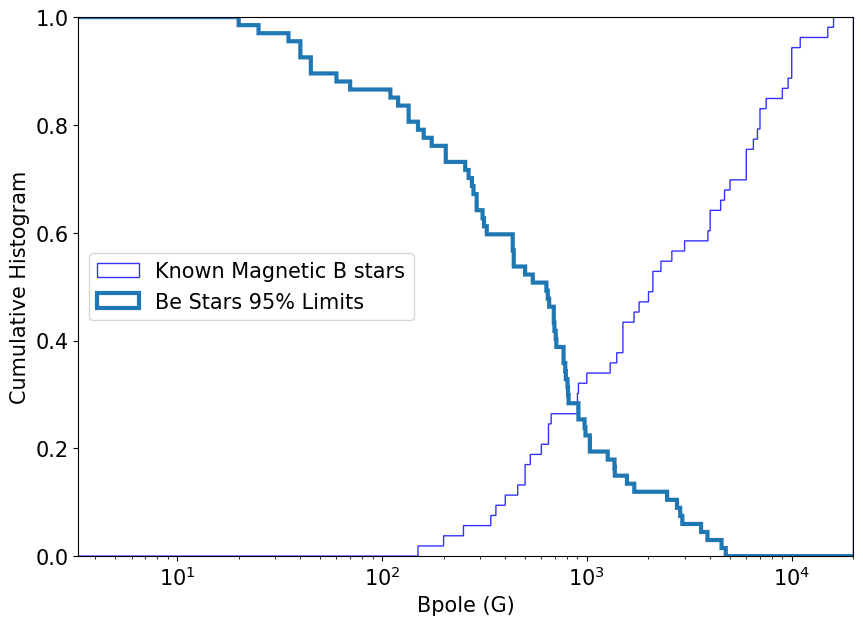

In [72]:

import pandas as pd
sheet_id = '1d5_XPFfdn-WQmM59VFjkZMHmiImjC46yeaRz9fulqpU'
sheet_name = 'Sheet1'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Bstars_prelim=pd.read_csv(url)
Bstars_prelim_B=Bstars_prelim['V_95_UB'].values[np.where(Bstars_prelim['V_95_LB']==0)]


bins=np.arange(0,20000+5,5)
Petit2013O=[1000,1700,1100,2500,20000,2800,500,1500,1700,60]
Petit2013B=[200,650,460,670,1500,1500,2100,360,1400,250,500,6000,400,6500,2100,16000,1500,4000,910,6000,9600,4700,3900,15000,600,650,1800,530,340,1700,900,1000,6000,900,11000,2600,10000,7000,10000,500,5000,150,9000,2000,7500,3000,6800,7000,4500,4000,21000,2300,1300,10000]


Petit2019O=pd.read_csv('C://Users/pjsta/asu.tsv', sep='\t',header=None)
Petit2019O


plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(1,1, figsize=(10,7))
#plt.step(bins[:-1],(np.cumsum(histtotal0/sum(histtotal0))),color='black',label='Be Stars')

plt.hist(Petit2013B,bins=bins,cumulative=True,histtype='step',density=True,color='b',alpha=0.8,label='Known Magnetic B stars')
#plt.hist(Petit2013O,bins=bins,cumulative=True,histtype='step',density=True,color='black',alpha=0.8,label='Known Magnetic O Stars')
#plt.hist(Petit2019O[4],bins=bins,cumulative=-1,histtype='step',density=True,color='black',alpha=0.8,label='O Stars 95% Upper Limits',linewidth=3)

#plt.hist(Bstars_prelim_B,bins=bins,cumulative=-1,histtype='step',density=True,color='b',alpha=0.8,label='B Stars Preliminary 95% Limits',linewidth=3)#,linestyle='--')

#plt.hist(model0['Lower 99.7%'], bins=bins,cumulative=True, density=True,histtype='step',color='orange',alpha=0.5)
plt.hist(model0['Lower 95.0%'], bins=bins,cumulative=-1, density=True,histtype='step',color='C0',alpha=1,label='Be Stars 95% Limits',linewidth=3)
#plt.hist(model0['Lower 68.0%'], bins=bins,cumulative=True, density=True,histtype='step',color='orange',alpha=0.5)

#plt.hlines(0.37,0,1400,color='red',linestyles='--')
#plt.vlines([1400],0,0.37,color='red',linestyles='--')
plt.legend(loc=6)
plt.xlabel('Bpole (G)')
plt.ylabel('Cumulative Histogram')
plt.xscale('log',base=10)
plt.ylim(0,1.0)
plt.xlim(0,20000)

plt.fill_between(bins,np.hist(model))
#plt.xlim(0,20000)

C:\Users\pjsta\AppData\Local\Temp\ipykernel_29084\381555749.py:48: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,20000)


(3.302683865249019, 20000)

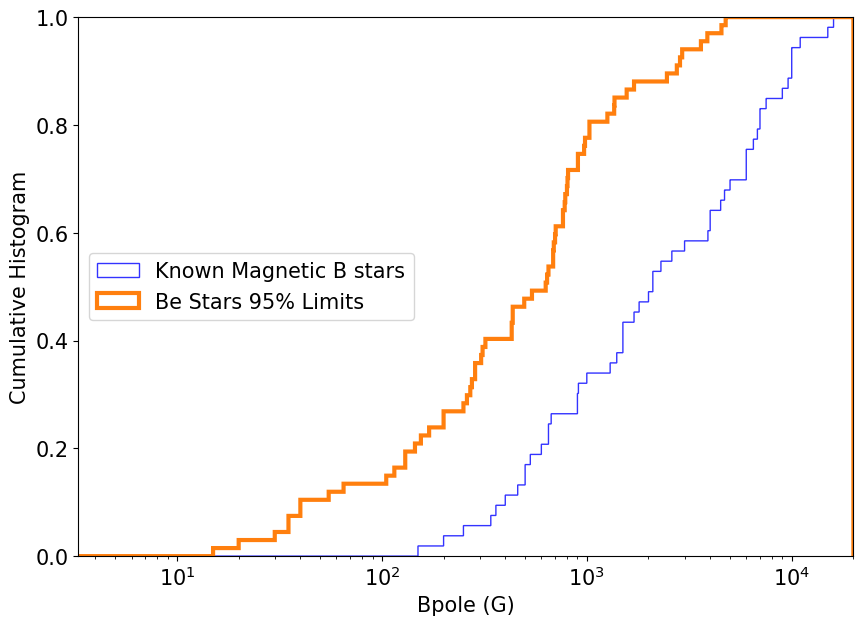

In [11]:

import pandas as pd
sheet_id = '1d5_XPFfdn-WQmM59VFjkZMHmiImjC46yeaRz9fulqpU'
sheet_name = 'Sheet1'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Bstars_prelim=pd.read_csv(url)
Bstars_prelim_B=Bstars_prelim['V_95_UB'].values[np.where(Bstars_prelim['V_95_LB']==0)]


bins=np.arange(0,20000+5,5)
Petit2013O=[1000,1700,1100,2500,20000,2800,500,1500,1700,60]
Petit2013B=[200,650,460,670,1500,1500,2100,360,1400,250,500,6000,400,6500,2100,16000,1500,4000,910,6000,9600,4700,3900,15000,600,650,1800,530,340,1700,900,1000,6000,900,11000,2600,10000,7000,10000,500,5000,150,9000,2000,7500,3000,6800,7000,4500,4000,21000,2300,1300,10000]


Petit2019O=pd.read_csv('C://Users/pjsta/asu.tsv', sep='\t',header=None)
Petit2019O


plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(1,1, figsize=(10,7))
#plt.step(bins[:-1],(np.cumsum(histtotal0/sum(histtotal0))),color='black',label='Be Stars')

n_dn,b_dn,p_dn=plt.hist(Petit2013B,bins=bins,cumulative=True,histtype='step',density=True,color='b',alpha=0.8,label='Known Magnetic B stars')
#plt.hist(Petit2013O,bins=bins,cumulative=True,histtype='step',density=True,color='black',alpha=0.8,label='Known Magnetic O Stars')
#plt.hist(Petit2019O[4],bins=bins,cumulative=-1,histtype='step',density=True,color='black',alpha=0.8,label='O Stars 95% Upper Limits',linewidth=3)

#n2,b2,p2=plt.hist(Bstars_prelim_B,bins=bins,cumulative=-1,histtype='step',density=True,color='b',alpha=0.8,label='B Stars Preliminary 95% Limits',linewidth=3)#,linestyle='--')

#plt.hist(model0['Lower 99.7%'], bins=bins,cumulative=True, density=True,histtype='step',color='orange',alpha=0.5)
n_up,b_up,p_up=plt.hist(hybrid_full_V_upper['Lower 95.0%'], bins=bins,cumulative=1, density=True,histtype='step',color='C1',alpha=1,label='Be Stars 95% Limits',linewidth=3)
#plt.hist(model0['Lower 68.0%'], bins=bins,cumulative=True, density=True,histtype='step',color='orange',alpha=0.5)

#b=np.concatenate([b_dn[np.where(n_dn<=n2)],b2[np.where(n2<=n_dn)]])
#n=np.concatenate([n_dn[np.where(n_dn<=n2)],n2[np.where(n2<=n_dn)]])
#plt.fill_between(b,n,np.zeros(n.size),color='b',alpha=0.5)

#b=np.concatenate([b_dn[np.where(n_dn<=n_up)],b_up[np.where(n_up<=n_dn)]])
#=np.concatenate([n_dn[np.where(n_dn<=n_up)],n_up[np.where(n_up<=n_dn)]])
#lt.fill_between(b,n,np.zeros(n.size),color='none',hatch='//',edgecolor='black')


#plt.hlines(0.37,0,1400,color='red',linestyles='--')
#plt.vlines([1400],0,0.37,color='red',linestyles='--')
plt.legend(loc=6)
plt.xlabel('Bpole (G)')
plt.ylabel('Cumulative Histogram')
plt.xscale('log',base=10)
plt.ylim(0,1.0)
plt.xlim(0,20000)
#plt.xlim(0,20000)

C:\Users\pjsta\AppData\Local\Temp\ipykernel_29084\260419398.py:43: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,20000)


Text(0.5, 1.0, '95% Credible Regions Cumulative')

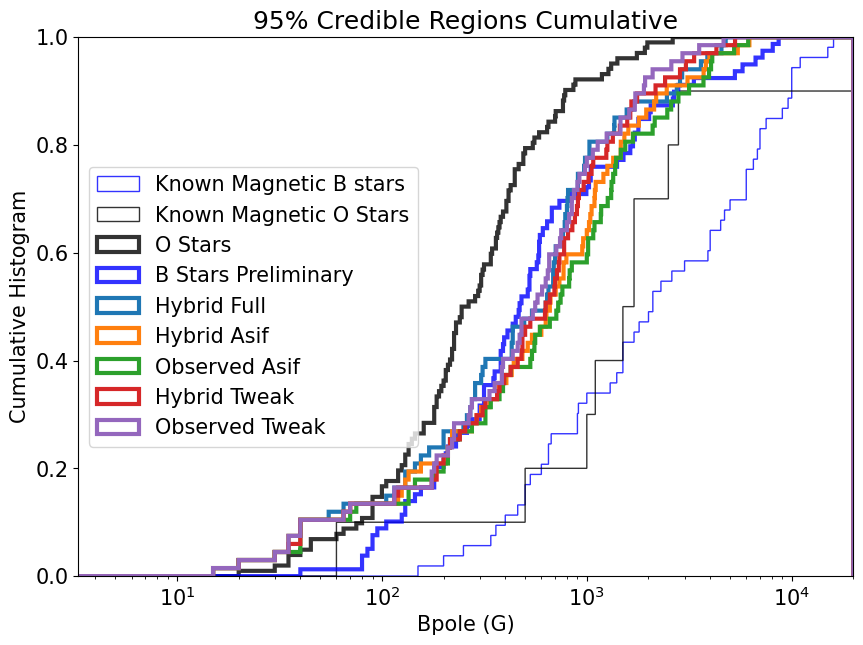

In [10]:

import pandas as pd
sheet_id = '1d5_XPFfdn-WQmM59VFjkZMHmiImjC46yeaRz9fulqpU'
sheet_name = 'Sheet1'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Bstars_prelim=pd.read_csv(url)
Bstars_prelim_B=Bstars_prelim['V_95_UB'].values[np.where(Bstars_prelim['V_95_LB']==0)]


bins=np.arange(0,20000+5,5)
Petit2013O=[1000,1700,1100,2500,20000,2800,500,1500,1700,60]
Petit2013B=[200,650,460,670,1500,1500,2100,360,1400,250,500,6000,400,6500,2100,16000,1500,4000,910,6000,9600,4700,3900,15000,600,650,1800,530,340,1700,900,1000,6000,900,11000,2600,10000,7000,10000,500,5000,150,9000,2000,7500,3000,6800,7000,4500,4000,21000,2300,1300,10000]


Petit2019O=pd.read_csv('C://Users/pjsta/asu.tsv', sep='\t',header=None)
Petit2019O


plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(1,1, figsize=(10,7))
#plt.step(bins[:-1],(np.cumsum(histtotal0/sum(histtotal0))),color='black',label='Be Stars')

plt.hist(Petit2013B,bins=bins,cumulative=True,histtype='step',density=True,color='b',alpha=0.8,label='Known Magnetic B stars')
plt.hist(Petit2013O,bins=bins,cumulative=True,histtype='step',density=True,color='black',alpha=0.8,label='Known Magnetic O Stars')
plt.hist(Petit2019O[4],bins=bins,cumulative=1,histtype='step',density=True,color='black',alpha=0.8,label='O Stars',linewidth=3)

plt.hist(Bstars_prelim_B,bins=bins,cumulative=1,histtype='step',density=True,color='b',alpha=0.8,label='B Stars Preliminary',linewidth=3)#,linestyle='--')

#plt.hist(model0['Lower 99.7%'], bins=bins,cumulative=True, density=True,histtype='step',color='orange',alpha=0.5)
plt.hist(hybrid_full_V_upper['Lower 95.0%'], bins=bins,cumulative=1, density=True,histtype='step',color='C0',alpha=1,label='Hybrid Full',linewidth=3)
plt.hist(hybrid_super_V_upper['Lower 95.0%'], bins=bins,cumulative=1, density=True,histtype='step',color='C1',alpha=1,label='Hybrid Asif',linewidth=3)
plt.hist(norm_super_V_upper['Lower 95.0%'], bins=bins,cumulative=1, density=True,histtype='step',color='C2',alpha=1,label='Observed Asif',linewidth=3)
plt.hist(hybrid_tweak_V_upper['Lower 95.0%'], bins=bins,cumulative=1, density=True,histtype='step',color='C3',alpha=1,label='Hybrid Tweak',linewidth=3)
plt.hist(norm_tweak_V_upper['Lower 95.0%'], bins=bins,cumulative=1, density=True,histtype='step',color='C4',alpha=1,label='Observed Tweak',linewidth=3)
#plt.hist(model0['Lower 68.0%'], bins=bins,cumulative=True, density=True,histtype='step',color='orange',alpha=0.5)

#plt.hlines(0.37,0,1400,color='red',linestyles='--')
#plt.vlines([1400],0,0.37,color='red',linestyles='--')
plt.legend(loc=6)
plt.xlabel('Bpole (G)')
plt.ylabel('Cumulative Histogram')
plt.xscale('log',base=10)
plt.ylim(0,1.0)
plt.xlim(0,20000)
plt.title('95% Credible Regions Cumulative')
#plt.xlim(0,20000)

## 6. Other Paper Plots (temp)

In [5]:
genparam = {
    'lambda0':5000,    # the central wavelength of the transition
    'vsini':300.0,         # the projected rotational velocity
    'vdop':10.0,          # the thermal broadening
    'av':0.05,             # the damping coefficient of the Voigt profile
    'bnu':1.5,             # the slope of the source function with respect to vertical optical depth
    'logkappa':-0.20,          # the line strength parameter
    'ndop':int(10),       # the number of sample point per doppler width for the wavelength array
    'res':65000,
    'vmac':30,
    'Bpole':5000,
    'incl':45,
    'beta':45,
    'phase':0
  }

weakparam = {
        'geff':1.0
    }

gridparam = {
        'Bpole_grid': np.linspace(0,5000,25),
        'incl_grid': np.linspace(0,180,18),
        'beta_grid': np.linspace(0,180,18),
        'phase_grid': np.linspace(0,360,18*2)
        }
    
param={'general' : genparam,
       'weak' : weakparam,
       'grid' : gridparam
       }


genparam = {
    'lambda0':5000,    # the central wavelength of the transition
    'vsini':100.0,         # the projected rotational velocity
    'vdop':10.0,          # the thermal broadening
    'av':0.05,             # the damping coefficient of the Voigt profile
    'bnu':1.5,             # the slope of the source function with respect to vertical optical depth
    'logkappa':-0.20,          # the line strength parameter
    'ndop':int(10),       # the number of sample point per doppler width for the wavelength array
    'res':65000,
    'vmac':30,
    'Bpole':5000,
    'incl':45,
    'beta':45,
    'phase':0
  }

weakparam = {
        'geff':1.0
    }

gridparam = {
        'Bpole_grid': np.linspace(0,5000,25),
        'incl_grid': np.linspace(0,180,18),
        'beta_grid': np.linspace(0,180,18),
        'phase_grid': np.linspace(0,360,18*2)
        }
    
param2={'general' : genparam,
       'weak' : weakparam,
       'grid' : gridparam
       }

In [6]:
model1 = rav.diskint.numerical(param)
model2 = rav.diskint.numerical(param2)

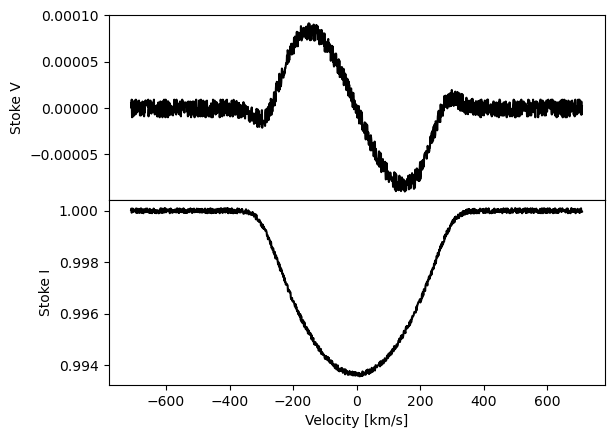

In [7]:
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(model1['vel'],model1['V']+np.random.randint(-10,10,size=model1['V'].size)*0.000001,color='black')
#ax[0].plot(model1['vel'],model2['V']+np.random.randint(-10,10,size=model1['V'].size)*0.000001,color='r')
ax[1].plot(model1['vel'],model1['flux']+np.random.randint(-10,10,size=model1['V'].size)*0.00001,color='black')
ax[0].set_ylabel('Stoke V')
ax[1].set_ylabel('Stoke I')
ax[1].set_xlabel('Velocity [km/s]')
#ax.set_title('Original')

plt.subplots_adjust(wspace=0, hspace=0)

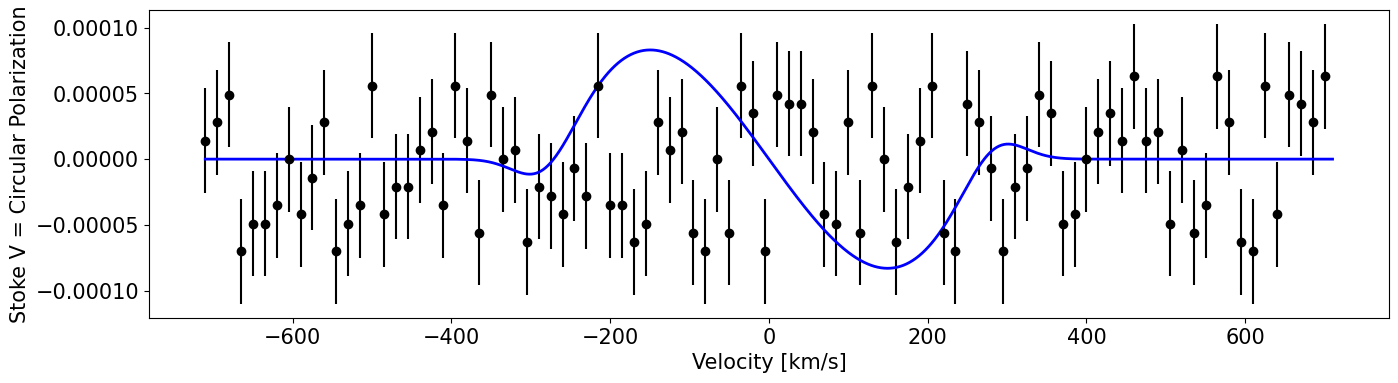

In [8]:
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(16,4))
np.random.seed(0)
ax.errorbar(model1['vel'][::15],(np.random.randint(-10,10,size=model1['V'].size)*0.000007)[::15],yerr=0.00004,color='black',fmt='o')
ax.plot(model1['vel'],model1['V'],color='b',linewidth=2)
ax.set_ylabel('Stoke V = Circular Polarization')
ax.set_xlabel('Velocity [km/s]')
#ax.set_title('Original')

plt.subplots_adjust(wspace=0, hspace=0)

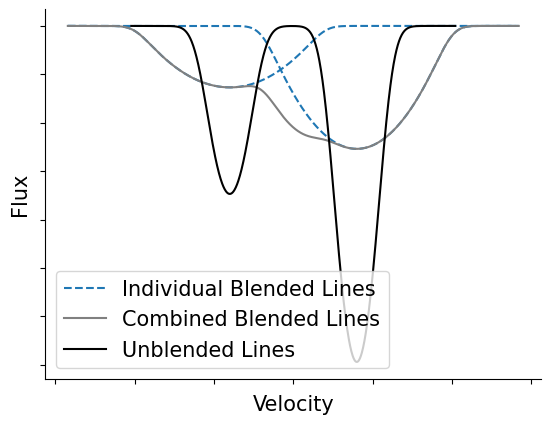

In [9]:
fig, ax = plt.subplots(1,1)

flux=np.interp(model1['vel'],model1['vel']+200,model1['flux'])
flux2=1-((1-np.interp(model1['vel'],model1['vel']-200,model1['flux']))/2)
combine=1-(1-flux+(1-flux2))

ax.plot(model1['vel'],flux,c='C0',linestyle='--',label='Individual Blended Lines')
ax.plot(model1['vel'],flux2,c='C0',linestyle='--')
ax.plot(model1['vel'],combine,c='0.5',label='Combined Blended Lines')

flux3=np.interp(model2['vel'],model2['vel']+200,model2['flux'])
flux4=1-((1-np.interp(model2['vel'],model2['vel']-200,model2['flux']))/2)
combine2=1-(2-flux3-flux4)
ax.plot(model2['vel'],combine2,c='k',label='Unblended Lines')

ax.set_yticklabels([])
ax.set_xticklabels([])

ax.spines[['right', 'top']].set_visible(False)

ax.set_xlabel('Velocity')
ax.set_ylabel('Flux')
ax.legend()

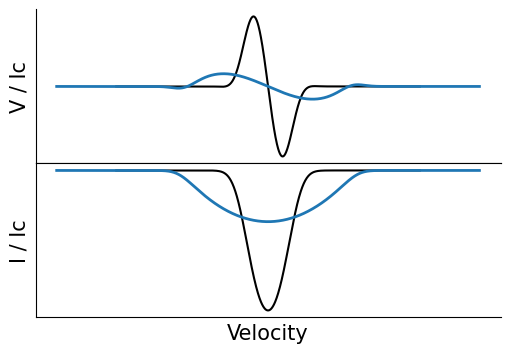

In [11]:
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(2,1,figsize=(6,4))
ax[0].plot(model2['vel'],model2['V'],color='black')
ax[0].plot(model1['vel'],model1['V'],color='C0',linewidth=2)
ax[1].plot(model2['vel'],model2['flux'],color='black')
ax[1].plot(model1['vel'],model1['flux'],color='C0',linewidth=2)
ax[0].set_ylabel('V / Ic')
ax[1].set_ylabel('I / Ic')
ax[1].set_xlabel('Velocity')
#ax.set_title('Original')
ax[0].set_yticks([])
ax[1].set_yticks([])
ax[0].set_xticks([])
ax[1].set_xticks([])

ax[0].spines[['top','right']].set_visible(False)
ax[1].spines[['right']].set_visible(False)

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('foo.png', bbox_inches='tight')

In [39]:
genparam = {
    'lambda0':5000,    # the central wavelength of the transition
    'vsini':100.0,         # the projected rotational velocity
    'vdop':10.0,          # the thermal broadening
    'av':0.05,             # the damping coefficient of the Voigt profile
    'bnu':1.5,             # the slope of the source function with respect to vertical optical depth
    'logkappa':-0.20,          # the line strength parameter
    'ndop':int(10),       # the number of sample point per doppler width for the wavelength array
    'res':65000,
    'vmac':30,
    'Bpole':20000,
    'incl':45,
    'beta':0,
    'phase':0
  }

weakparam = {
        'geff':1.0
    }

unnoparam = {
    'down':[0, 0, 0],   # the s, j, l of the lower level
    'up':[0, 1, 1],    # the s, j, l of the upper level
    }

gridparam = {
        'Bpole_grid': np.linspace(0,5000,25),
        'incl_grid': np.linspace(0,180,18),
        'beta_grid': np.linspace(0,180,18),
        'phase_grid': np.linspace(0,360,18*2)
        }
    
param={'general' : genparam,
       'weak' : weakparam,
       'grid' : gridparam,
       'unno' : unnoparam
       }
model1 = rav.diskint2.numerical(param,True)
genparam = {
    'lambda0':5000,    # the central wavelength of the transition
    'vsini':100.0,         # the projected rotational velocity
    'vdop':10.0,          # the thermal broadening
    'av':0.05,             # the damping coefficient of the Voigt profile
    'bnu':1.5,             # the slope of the source function with respect to vertical optical depth
    'logkappa':-0.20,          # the line strength parameter
    'ndop':int(10),       # the number of sample point per doppler width for the wavelength array
    'res':65000,
    'vmac':30,
    'Bpole':200000,
    'incl':45,
    'beta':0,
    'phase':0
  }

weakparam = {
        'geff':1.0
    }

unnoparam = {
    'down':[0, 0, 0],   # the s, j, l of the lower level
    'up':[0, 1, 1],    # the s, j, l of the upper level
    }

gridparam = {
        'Bpole_grid': np.linspace(0,5000,25),
        'incl_grid': np.linspace(0,180,18),
        'beta_grid': np.linspace(0,180,18),
        'phase_grid': np.linspace(0,360,18*2)
        }
    
param2={'general' : genparam,
       'weak' : weakparam,
       'grid' : gridparam,
       'unno' : unnoparam
       }
model2 = rav.diskint2.numerical(param2,True)
genparam = {
    'lambda0':5000,    # the central wavelength of the transition
    'vsini':100.0,         # the projected rotational velocity
    'vdop':10.0,          # the thermal broadening
    'av':0.05,             # the damping coefficient of the Voigt profile
    'bnu':1.5,             # the slope of the source function with respect to vertical optical depth
    'logkappa':-0.20,          # the line strength parameter
    'ndop':int(10),       # the number of sample point per doppler width for the wavelength array
    'res':65000,
    'vmac':30,
    'Bpole':1000,
    'incl':45,
    'beta':0,
    'phase':0
  }

weakparam = {
        'geff':1.0
    }

unnoparam = {
    'down':[0, 0, 0],   # the s, j, l of the lower level
    'up':[0, 1, 1],    # the s, j, l of the upper level
    }

gridparam = {
        'Bpole_grid': np.linspace(0,5000,25),
        'incl_grid': np.linspace(0,180,18),
        'beta_grid': np.linspace(0,180,18),
        'phase_grid': np.linspace(0,360,18*2)
        }
    
param3={'general' : genparam,
       'weak' : weakparam,
       'grid' : gridparam,
       'unno' : unnoparam
       }
model3 = rav.diskint2.numerical(param3,True)



fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(model1['vel'],model1['V'],color='black')
#ax[0].plot(model2['vel'],model2['V'],color='red')
ax[0].plot(model3['vel'],model3['V'],color='blue')

ax[1].plot(model1['vel'],model1['flux'],color='black')
#ax[1].plot(model2['vel'],model2['flux'],color='red')
ax[1].plot(model3['vel'],model3['flux'],color='blue')
ax[0].set_ylabel('Stoke V')
ax[1].set_ylabel('Stoke I')
ax[1].set_xlabel('Velocity [km/s]')
#ax.set_title('Original')

plt.subplots_adjust(wspace=0, hspace=0)

AttributeError: module 'pyRaven' has no attribute 'diskint2'

Max shift due to field: 0.0 vdop
Max shift due to vsini: 5.0 vdop
Max shift due to field: 1.084609889138757 vdop
Max shift due to vsini: 5.0 vdop
Max shift due to field: 10.84609889138757 vdop
Max shift due to vsini: 5.0 vdop
Max shift due to field: 0.10846098891387569 vdop
Max shift due to vsini: 5.0 vdop


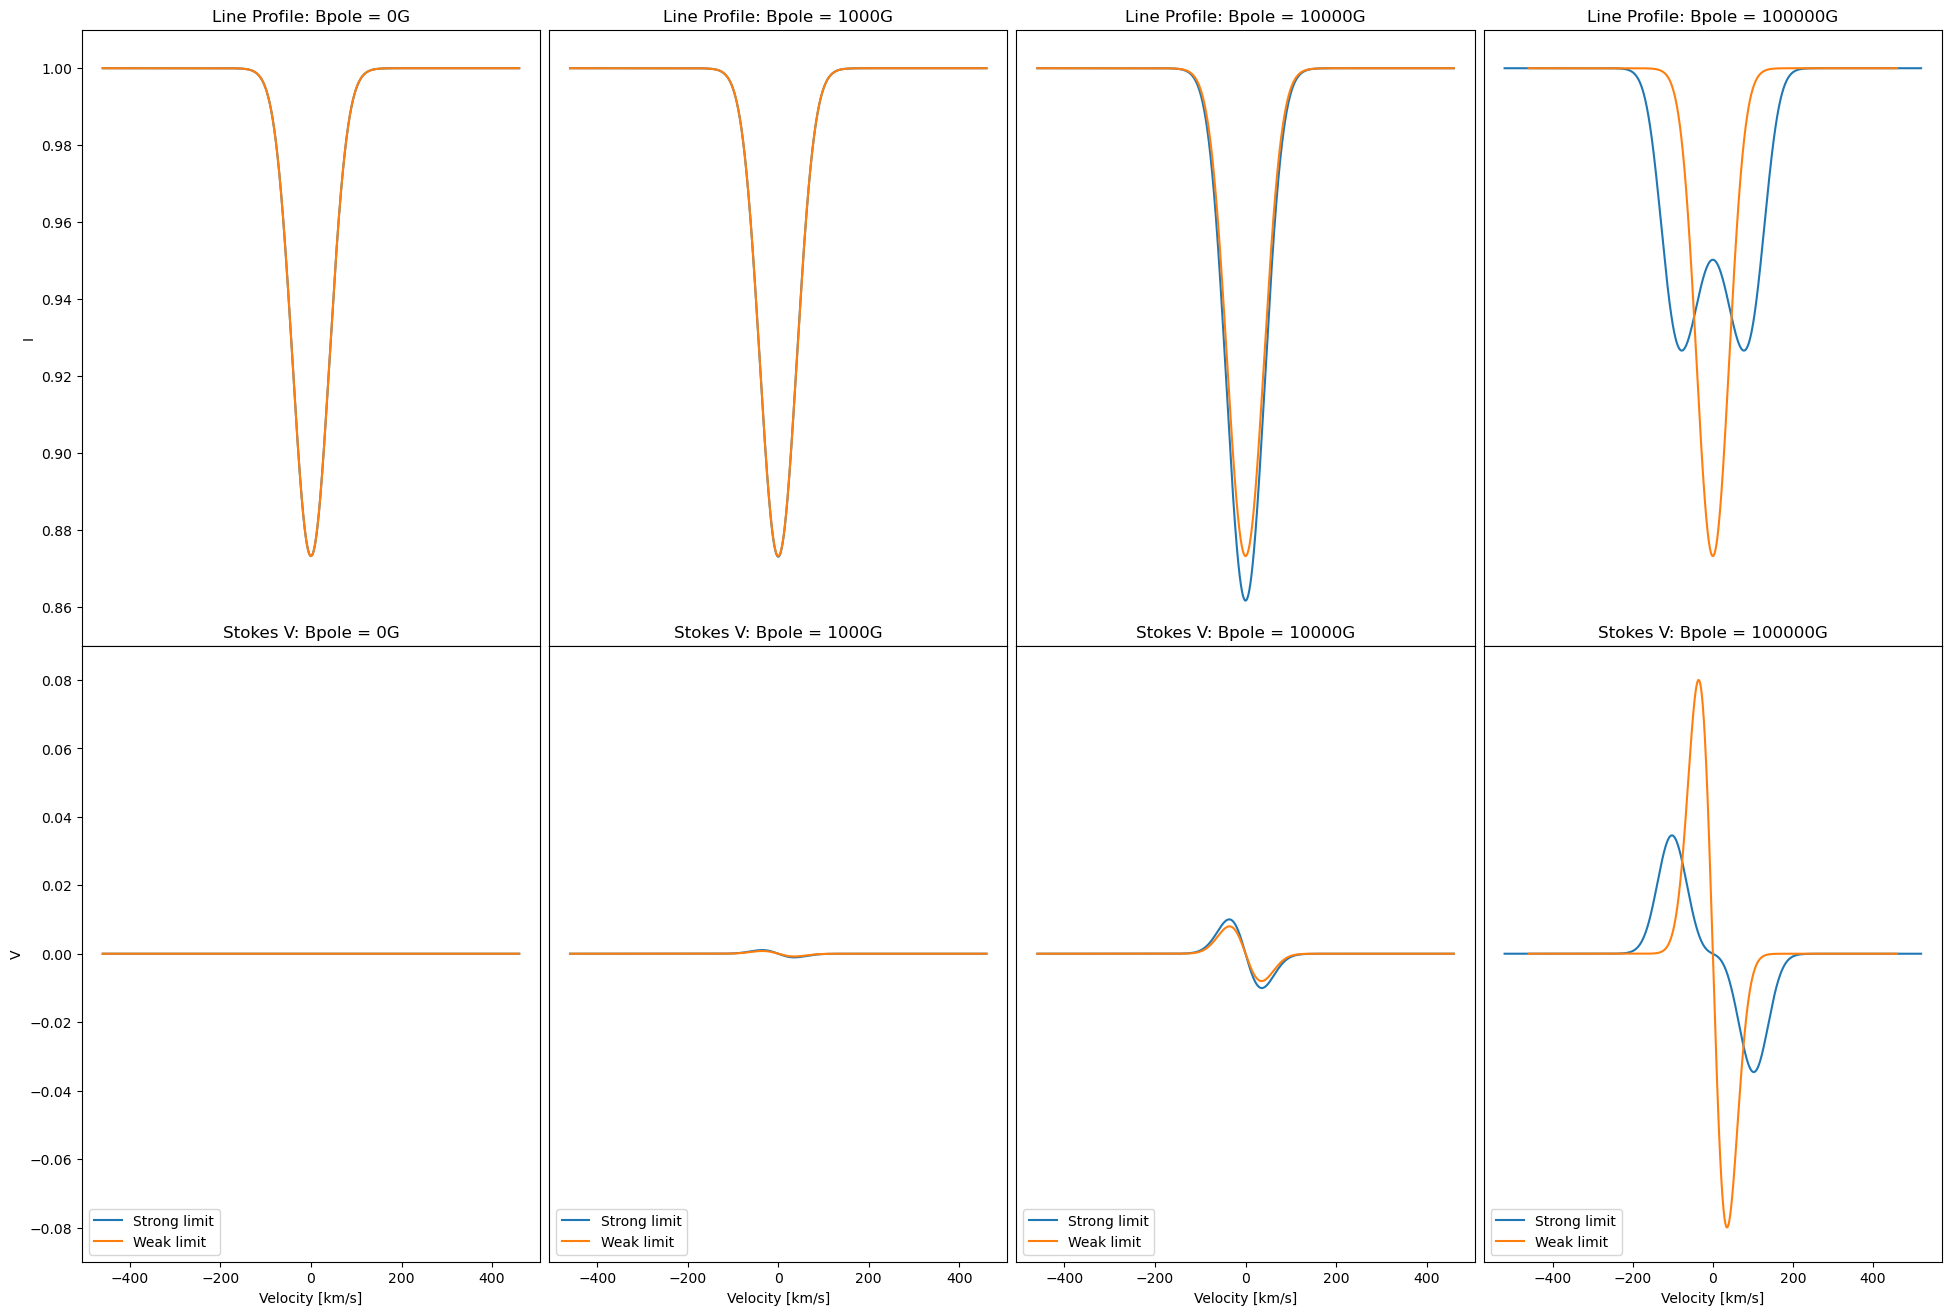

In [14]:
genparam = {
    'lambda0':5811.969,    # the central wavelength of the transition
    'vsini':50.0,         # the projected rotational velocity
    'vdop':10.0,          # the thermal broadening
    'av':0.05,             # the damping coefficient of the Voigt profile
    'bnu':1.5,             # the slope of the source function with respect to vertical optical depth
    'logkappa':0.98,          # the line strength parameter
    'ndop':int(100),       # the number of sample point per doppler width for the wavelength array
    'res':65000,
    'vmac':30,
    'Bpole':0,
    'incl':45,
    'beta':45,
    'phase':0
  }

weakparam = {
        'geff':1.0
    }

unnoparam = {
    'down':[0.5, 0, 0.5],   # the s, j, l of the lower level
    'up':[0.5, 1, 0.5],    # the s, j, l of the upper level
    }

gridparam = {
        'Bpole_grid': np.linspace(0,5000,25),
        'incl_grid': np.linspace(0,180,18),
        'beta_grid': np.linspace(0,180,18),
        'phase_grid': np.linspace(0,360,18*2)
        }
    
param={'general' : genparam,
       'weak' : weakparam,
       'grid' : gridparam,
       'unno' : unnoparam
       }
model1 = rav.diskint.numerical(param,False)
model1s = rav.diskint.numerical(param,True)

genparam = {
    'lambda0':5811.969,    # the central wavelength of the transition
    'vsini':50.0,         # the projected rotational velocity
    'vdop':10.0,          # the thermal broadening
    'av':0.05,             # the damping coefficient of the Voigt profile
    'bnu':1.5,             # the slope of the source function with respect to vertical optical depth
    'logkappa':0.98,          # the line strength parameter
    'ndop':int(100),       # the number of sample point per doppler width for the wavelength array
    'res':65000,
    'vmac':30,
    'Bpole':10000,
    'incl':45,
    'beta':45,
    'phase':0
  }


param2={'general' : genparam,
       'weak' : weakparam,
       'grid' : gridparam,
       'unno' : unnoparam
       }
model2 = rav.diskint.numerical(param2,False)
model2s = rav.diskint.numerical(param2,True)

genparam = {
    'lambda0':5811.969,    # the central wavelength of the transition
    'vsini':50.0,         # the projected rotational velocity
    'vdop':10.0,          # the thermal broadening
    'av':0.05,             # the damping coefficient of the Voigt profile
    'bnu':1.5,             # the slope of the source function with respect to vertical optical depth
    'logkappa':0.98,          # the line strength parameter
    'ndop':int(100),       # the number of sample point per doppler width for the wavelength array
    'res':65000,
    'vmac':30,
    'Bpole':100000,
    'incl':45,
    'beta':45,
    'phase':0
  }

param3={'general' : genparam,
       'weak' : weakparam,
       'grid' : gridparam,
       'unno' : unnoparam
       }
model3 = rav.diskint.numerical(param3,False)
model3s = rav.diskint.numerical(param3,True)

genparam = {
    'lambda0':5811.969,    # the central wavelength of the transition
    'vsini':50.0,         # the projected rotational velocity
    'vdop':10.0,          # the thermal broadening
    'av':0.05,             # the damping coefficient of the Voigt profile
    'bnu':1.5,             # the slope of the source function with respect to vertical optical depth
    'logkappa':0.98,          # the line strength parameter
    'ndop':int(100),       # the number of sample point per doppler width for the wavelength array
    'res':65000,
    'vmac':30,
    'Bpole':1000,
    'incl':45,
    'beta':45,
    'phase':0
  }

param4={'general' : genparam,
       'weak' : weakparam,
       'grid' : gridparam,
       'unno' : unnoparam
       }
model4 = rav.diskint.numerical(param4,False)
model4s = rav.diskint.numerical(param4,True)

fig, ax = plt.subplots(2,4,figsize=(24,16))
ax[0,0].plot(model1s["vel"], model1s['flux'])
ax[0,0].plot(model1["vel"], model1["flux"])
ax[0,0].set_xlabel('Velocity [km/s]')
ax[0,0].set_ylabel('I')
ax[0,0].set_ylim(0.85,1.01)

ax[1,0].plot(model1s["vel"], model1s["V"],label='Strong limit')
ax[1,0].plot(model1["vel"], model1["V"],label='Weak limit')
ax[1,0].set_title('Stokes V: Bpole = {}G'.format(param['general']['Bpole']))
ax[1,0].set_xlabel('Velocity [km/s]')
ax[1,0].set_ylabel('V')
ax[1,0].set_ylim(-0.09,0.09)
ax[1,0].legend(loc='lower left')

ax[0,1].plot(model4s["vel"], model4s['flux'])
ax[0,1].plot(model4["vel"], model4["flux"])
ax[0,1].set_xlabel('Velocity [km/s]')
ax[0,1].set_ylim(0.85,1.01)
ax[0,1].set_yticks([])

ax[1,1].plot(model4s["vel"], model4s["V"],label='Strong limit')
ax[1,1].plot(model4["vel"], model4["V"],label='Weak limit')
ax[1,1].set_title('Stokes V: Bpole = {}G'.format(param4['general']['Bpole']))
ax[1,1].set_xlabel('Velocity [km/s]')
ax[1,1].set_ylim(-0.09,0.09)
ax[1,1].set_yticks([])
ax[1,1].legend(loc='lower left')

ax[0,2].plot(model2s["vel"], model2s['flux'])
ax[0,2].plot(model2["vel"], model2["flux"])
ax[0,2].set_xlabel('Velocity [km/s]')
ax[0,2].set_ylim(0.85,1.01)
ax[0,2].set_yticks([])

ax[1,2].plot(model2s["vel"], model2s["V"],label='Strong limit')
ax[1,2].plot(model2["vel"], model2["V"],label='Weak limit')
ax[1,2].set_title('Stokes V: Bpole = {}G'.format(param2['general']['Bpole']))
ax[1,2].set_xlabel('Velocity [km/s]')
ax[1,2].set_ylim(-0.09,0.09)
ax[1,2].set_yticks([])
ax[1,2].legend(loc='lower left')

ax[0,3].plot(model3s["vel"], model3s['flux'])
ax[0,3].plot(model3["vel"], model3["flux"])
ax[0,3].set_xlabel('Velocity [km/s]')
ax[0,3].set_ylim(0.85,1.01)
ax[0,3].set_yticks([])

ax[1,3].plot(model3s["vel"], model3s["V"],label='Strong limit')
ax[1,3].plot(model3["vel"], model3["V"],label='Weak limit')
ax[1,3].set_title('Stokes V: Bpole = {}G'.format(param3['general']['Bpole']))
ax[1,3].set_xlabel('Velocity [km/s]')
ax[1,3].set_ylim(-0.09,0.09)
ax[1,3].set_yticks([])
ax[1,3].legend(loc='lower left')

plt.subplots_adjust(wspace=0.02,hspace=0)

In [12]:
def read_disk(file):
  '''
  Read a synthetic spectrum from a s3div output

  :param file: The filename
  :rtype: wave, flux -- the wavelength in nm, and the normalized flux. 
  '''
  with open(file) as f:
    lines = f.readlines()
  # number of atomic lines in the header of the file
  natomic = int(lines[0].split(sep='-')[0])
  nwave=int(lines[natomic+1].split()[0])
  data = np.genfromtxt(lines[natomic+2:natomic+1+nwave])
  return(data[:,0]/10.0, data[:,1])

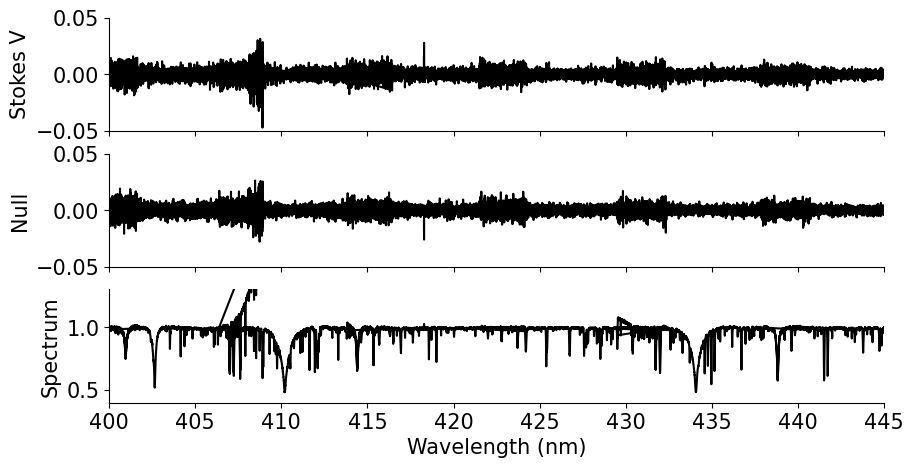

In [13]:
star = 'h46328_test'

file = r'C:\Users\pjsta\GitHub\specpolFlow\docs-jb\GetStarted\OneObservationFlow_tutorialfiles\hd46328_test_3.s'
data = pol.read_spectrum(file)


fig, ax = plt.subplots(3,1, figsize=(10,5),sharex=True)

ax[2].plot(data.wl, data.specI, c='k')
ax[0].plot(data.wl, data.specV, c='k')
ax[1].plot(data.wl, data.specN1, c='k')

#ax.plot(wl, f, c='k')
#ax.plot(hybrid.wl, hybrid.specI, c='k')
ax[2].set_xlim(400,445)
ax[2].set_ylim(0.4, 1.3)
ax[2].set_xlabel('Wavelength (nm)')
ax[2].set_ylabel('Spectrum')

ax[2].spines[['right', 'top']].set_visible(False)

ax[1].set_xlim(400,445)
ax[1].set_ylim(-0.05,0.05)
ax[1].set_ylabel('Null')

ax[1].spines[['right', 'top']].set_visible(False)

ax[0].set_xlim(400,445)
ax[0].set_ylim(-0.05,0.05)
ax[0].set_ylabel('Stokes V')

ax[0].spines[['right', 'top']].set_visible(False)

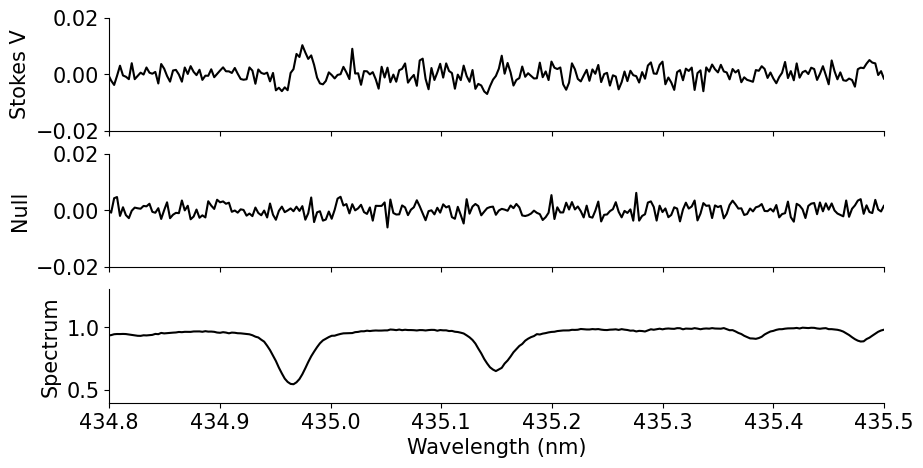

In [14]:
star = 'h46328_test'

file = r'C:\Users\pjsta\GitHub\specpolFlow\docs-jb\GetStarted\OneObservationFlow_tutorialfiles\hd46328_test_3.s'
data = pol.read_spectrum(file)


fig, ax = plt.subplots(3,1, figsize=(10,5),sharex=True)

ax[2].plot(data.wl, data.specI, c='k')
ax[0].plot(data.wl, data.specV, c='k')
ax[1].plot(data.wl, data.specN1, c='k')

#ax.plot(wl, f, c='k')
#ax.plot(hybrid.wl, hybrid.specI, c='k')
ax[2].set_xlim(420,430)
ax[2].set_ylim(0.4, 1.3)
ax[2].set_xlabel('Wavelength (nm)')
ax[2].set_ylabel('Spectrum')

ax[2].spines[['right', 'top']].set_visible(False)

ax[1].set_xlim(400,445)
ax[1].set_ylim(-0.02,0.02)
ax[1].set_ylabel('Null')

ax[1].spines[['right', 'top']].set_visible(False)

ax[0].set_xlim(434.8,435.5)
ax[0].set_ylim(-0.02,0.02)
ax[0].set_ylabel('Stokes V')

ax[0].spines[['right', 'top']].set_visible(False)

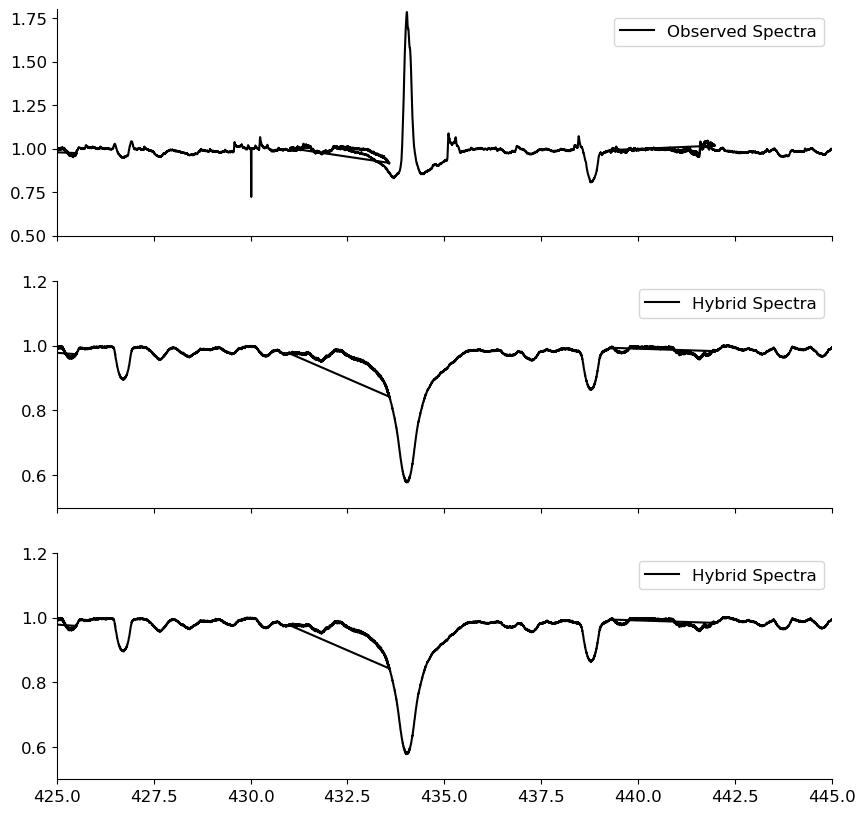

In [14]:
star = 'hd148184'

file = r'{}/00-InputMaterial/NormalizedSpectra/{}_1.s'.format(path,star)
data = pol.read_spectrum(file)

file = r'{}/01-Synth-calculations/Synth-hybrid-spectra/{}_1_noise.s'.format(path,star)
data1 = pol.read_spectrum(file)

#file=r'{}/02-Mask-calculations/MaskCleaning/depth0.01_tellClean/T21000G35_depth0.02.mask'.format(path)
#fullmask = pol.read_mask(file)

#file=r'{}/02-Mask-calculations/MaskCleaning/AsifMaskClean_tellClean/{}_clean_1.mask'.format(path,star)
#mask = pol.read_mask(file)

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(3,1, figsize=(10,10),sharex=True)

ax[0].plot(data.wl, data.specI, c='k',label='Observed Spectra')
ax[0].set_xlim(425,445)
ax[0].set_ylim(0.5,1.8)
ax[0].spines[['right', 'top']].set_visible(False)
#ax[0].vlines(x=mask.wl[mask.iuse==1],ymin=1-mask.depth[mask.iuse==1],ymax=1,color='g',label='Uncontaminated Mask')
ax[0].legend()

ax[1].plot(data1.wl, data1.specI, c='k',label='Hybrid Spectra')
ax[1].set_xlim(425,445)
ax[1].set_ylim(0.5,1.2)
ax[1].spines[['right', 'top']].set_visible(False)
#ax[1].vlines(x=mask.wl[mask.iuse==1],ymin=1-mask.depth[mask.iuse==1],ymax=1,color='g',label='Uncontaminated Mask')
ax[1].legend()

ax[2].plot(data1.wl, data1.specI, c='k',label='Hybrid Spectra')
ax[2].set_xlim(425,445)
ax[2].set_ylim(0.5,1.2)
ax[2].spines[['right', 'top']].set_visible(False)
#ax[2].vlines(x=fullmask.wl[fullmask.iuse==1],ymin=1-fullmask.depth[fullmask.iuse==1],ymax=1,color='orange',label='Full Mask')
ax[2].legend()

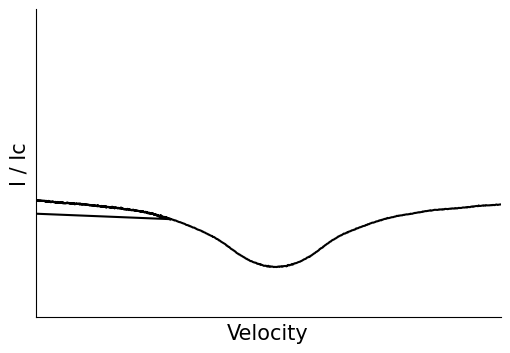

In [20]:
star = 'hd148184'

file = r'{}/00-InputMaterial/NormalizedSpectra/{}_1.s'.format(path,star)
data = pol.read_spectrum(file)

file = r'{}/01-Synth-calculations/Synth-hybrid-spectra/{}_1_noise.s'.format(path,star)
data1 = pol.read_spectrum(file)

plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(data1.wl,data1.specI,color='black')
#ax.plot(data.wl,data.specI,color='C0',linewidth=2)
ax.set_ylabel('I / Ic')
ax.set_xlabel('Velocity')
#ax.set_title('Original')
ax.set_xlim(433,435)
ax.set_ylim(0.3,2)
ax.spines[['right', 'top']].set_visible(False)
plt.subplots_adjust(wspace=0, hspace=0)
#ax.axis('off')
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('withoutemission.png', bbox_inches='tight')

In [11]:
StarData['Name'][np.where(StarData['pyRavenFlag']==2)[0]].values

array(['hd7636', 'hd20336', 'hd37202', 'hd48917', 'hd58050', 'hd58343',
       'hd71072', 'hd72067', 'hd89884', 'hd120324', 'hd173948',
       'hd181231', 'hd198183', 'hd203467', 'hd214748'], dtype=object)